In [ ]:
from pathlib import Path
import json
import itertools
import sys, os
import datetime as dt
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
PROJPATH = Path().resolve().parent
sys.path.append((PROJPATH / 'scripts').as_posix())
import riverice_util as ru

In [ ]:
username = os.environ['USER']
username

'chris'

In [ ]:
prefix = "DD25"       # set to TDD for Thawing Degree Days

tdd_anomalycorr = f"/Users/{username}/Projects/2023_Riverice/data/breakupdata/derived/{prefix}_anomaly_correlations.csv"
breakup_stats = f"/Users/{username}/Projects/2023_Riverice/data/breakupdata/derived/breakupdate_mean_std_1983_2022.csv"
breakupdata = Path(f'/Users/{username}/Projects/2023_Riverice/data/breakupdata/')
stationfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS/{prefix}/dd_cumul_bystation")
outfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/working")

Rename station names

In [ ]:
anomalycorrDF = pd.read_csv(tdd_anomalycorr, header=3, index_col=0)
anomalycorrDF

date                    stationname                  location  \
0      04-01                        ALYESKA  Koyukuk River at Bettles   
1      04-01        ANCHORAGE_MERRILL_FIELD  Koyukuk River at Bettles   
2      04-01  ANCHORAGE_TED_STEVENS_INTL_AP  Koyukuk River at Bettles   
3      04-01                       AUKE_BAY  Koyukuk River at Bettles   
4      04-01                      BARROW_AP  Koyukuk River at Bettles   
...      ...                            ...                       ...   
98600  06-04                       SITKA_AP    Gakona River at Gakona   
98601  06-04                     SKAGWAY_AP    Gakona River at Gakona   
98602  06-04                   TALKEETNA_AP    Gakona River at Gakona   
98603  06-04                      TANANA_AP    Gakona River at Gakona   
98604  06-04                     YAKUTAT_AP    Gakona River at Gakona   

             r2         r         p   DateStamp  
0      0.006324  0.079526  0.635067  2000-04-01  
1      0.000352 -0.018763  0.929067  2000-04-01  
2      0.004262  0.065284  0.685092  2000-04-01  
3      0.005658  0.075220  0.644580  2000-04-01  
4      0.009983  0.099915  0.534245  2000-04-01  
...         ...       ...       ...         ...  
98600  0.115278 -0.339527  0.049471  2000-06-04  
98601  0.065209 -0.255361  0.208012  2000-06-04  
98602  0.324413 -0.569573  0.000438  2000-06-04  
98603  0.093829 -0.306316  0.082962  2000-06-04  
98604  0.076563 -0.276700  0.113152  2000-06-04  

[98605 rows x 7 columns]

In [ ]:
sorted(anomalycorrDF.location.unique())

['Buckland River at Buckland',
 'Chena River at Fairbanks',
 'Chisana River at Northway',
 'Gakona River at Gakona',
 'Gulkana River nr Gakona',
 'Kobuk River at Ambler',
 'Kobuk River at Kobuk',
 'Kobuk River at Shungnak',
 'Koyukuk River at Allakaket',
 'Koyukuk River at Bettles',
 'Koyukuk River at Hughes',
 'Kuskokwim River at Akiak',
 'Kuskokwim River at Aniak',
 'Kuskokwim River at Bethel',
 'Kuskokwim River at Crooked Creek',
 'Kuskokwim River at Kalskag',
 'Kuskokwim River at McGrath',
 'Kuskokwim River at Nikolai',
 'Kuskokwim River at Red Devil',
 'Kuskokwim River at Sleetmute',
 'Kuskokwim River at Stony River',
 'Kuskokwim River at Tuluksak',
 'Susitna River at Sunshine',
 'Tanana River at Nenana',
 'Tanana River nr Manley Hot Springs',
 'Yentna River at Lake Creek',
 'Yukon River at Alakanuk',
 'Yukon River at Anvik',
 'Yukon River at Circle',
 'Yukon River at Dawson',
 'Yukon River at Eagle',
 'Yukon River at Fort Yukon',
 'Yukon River at Galena',
 'Yukon River at Holy Cr

### Prototyping: Eagle, Northway

In [ ]:
# location = 'Chisana River at Northway'
# location = 'Yukon River at Russian Mission'
location = 'Yukon River at Eagle'

In [ ]:
eagleDF = anomalycorrDF[anomalycorrDF.location == location]
eagleDF['DateStamp'] = pd.to_datetime(eagleDF['DateStamp'], format='%Y-%m-%d')
eagleDF

/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/121066999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eagleDF['DateStamp'] = pd.to_datetime(eagleDF['DateStamp'], format='%Y-%m-%d')


date                    stationname              location        r2  \
1147   04-01                        ALYESKA  Yukon River at Eagle  0.039465   
1148   04-01        ANCHORAGE_MERRILL_FIELD  Yukon River at Eagle  0.076806   
1149   04-01  ANCHORAGE_TED_STEVENS_INTL_AP  Yukon River at Eagle  0.015018   
1150   04-01                       AUKE_BAY  Yukon River at Eagle  0.019506   
1151   04-01                      BARROW_AP  Yukon River at Eagle  0.007911   
...      ...                            ...                   ...       ...   
98267  06-04                       SITKA_AP  Yukon River at Eagle  0.301944   
98268  06-04                     SKAGWAY_AP  Yukon River at Eagle  0.295278   
98269  06-04                   TALKEETNA_AP  Yukon River at Eagle  0.438530   
98270  06-04                      TANANA_AP  Yukon River at Eagle  0.587404   
98271  06-04                     YAKUTAT_AP  Yukon River at Eagle  0.274871   

              r             p  DateStamp  
1147  -0.198657  2.253684e-01 2000-04-01  
1148  -0.277139  1.798554e-01 2000-04-01  
1149  -0.122547  4.337033e-01 2000-04-01  
1150  -0.139664  3.776966e-01 2000-04-01  
1151  -0.088945  5.705863e-01 2000-04-01  
...         ...           ...        ...  
98267 -0.549494  1.354453e-04 2000-06-04  
98268 -0.543395  1.082957e-03 2000-06-04  
98269 -0.662216  1.321208e-06 2000-06-04  
98270 -0.766423  3.290229e-09 2000-06-04  
98271 -0.524281  3.078187e-04 2000-06-04  

[2405 rows x 7 columns]

In [ ]:
grouped = eagleDF.drop(
        columns=['date', 'location', 'r', 'p']).groupby(
                ['stationname', pd.Grouper(key='DateStamp', freq='15D')]).mean().reset_index()

In [ ]:
max4 = (
    grouped
        .groupby(['DateStamp'])
        .apply(lambda group: group.nlargest(4, columns='r2'))
).reset_index(drop=True)

In [ ]:
max4

stationname  DateStamp        r2
0     FAIRBANKS_INTL_AP 2000-04-01  0.173141
1               CHICKEN 2000-04-01  0.165085
2            NORTH_POLE 2000-04-01  0.146887
3                 EAGLE 2000-04-01  0.142157
4     FAIRBANKS_INTL_AP 2000-04-16  0.501173
5                 EAGLE 2000-04-16  0.453375
6   COLLEGE_OBSERVATORY 2000-04-16  0.445269
7            NORTH_POLE 2000-04-16  0.426533
8                 EAGLE 2000-05-01  0.713936
9               CHICKEN 2000-05-01  0.709994
10    FAIRBANKS_INTL_AP 2000-05-01  0.688318
11        MCKINLEY_PARK 2000-05-01  0.674506
12                EAGLE 2000-05-16  0.628680
13    FAIRBANKS_INTL_AP 2000-05-16  0.627514
14            TANANA_AP 2000-05-16  0.608215
15        MCKINLEY_PARK 2000-05-16  0.598017
16    FAIRBANKS_INTL_AP 2000-05-31  0.617486
17                EAGLE 2000-05-31  0.590600
18  COLLEGE_OBSERVATORY 2000-05-31  0.588810
19        MCKINLEY_PARK 2000-05-31  0.583565

In [ ]:
datestamps = ['2000-04-01', '2000-04-16',
       '2000-05-01', '2000-05-16']

In [ ]:
sites = set()
maxN = 10
for datestamp in datestamps:
    for station in max4[max4.DateStamp== datestamp].stationname.to_list():
        if station == 'COLLEGE_OBSERVATORY':
            continue
        if station not in sites:
            break
    print(station)
    sites.add(station)
    if len(sites) == maxN:
        break 

FAIRBANKS_INTL_AP
EAGLE
CHICKEN
TANANA_AP


In [ ]:
sites

{'CHICKEN', 'EAGLE', 'FAIRBANKS_INTL_AP', 'TANANA_AP'}

In [ ]:
def restore_stationnames(stationlst):
    return [
        item.replace('AP', 'AIRPORT')           # .replace('INTL', 'INTERNATIONAL')
        for item in stationlst
        ]

sites1 = list(sites)
# sites1 = restore_stationnames(sites1)
sites2 = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AP', 'NENANA_MUN_AP']
sites2 = restore_stationnames(sites2)
sites1, sites2

(['ANCHORAGE_MERRILL_FIELD', 'NENANA_MUN_AP', 'GULKANA_AP', 'CHICKEN'],
 ['FAIRBANKS_INTL_AIRPORT',
  'EAGLE',
  'BIG_DELTA_AIRPORT',
  'NENANA_MUN_AIRPORT'])

In [ ]:
stationsdfs = {}
stationfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS/{prefix}/dd_cumul_bystation")
for station in sites1:
    try:
        stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_{prefix}_cumul.csv", skiprows=4, index_col=0)
    except FileNotFoundError:
        stationsdfs[station] = pd.read_csv(stationfolder / f"{restore_stationnames([station])[0]}_yearly_{prefix}_cumul.csv", skiprows=4, index_col=0)

In [ ]:
stationsdfs.keys()

dict_keys(['ANCHORAGE_MERRILL_FIELD', 'NENANA_MUN_AP', 'GULKANA_AP', 'CHICKEN'])

In [ ]:
# sites2 = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTAa_AP', 'NENANA_MUN_AP']
# stationsdfs = {}
# stationfolder = Path("/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation")
# for station in sites2:
#     stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_TDD_cumul.csv", skiprows=4, index_col=0)

In [ ]:
stationsdfs['FAIRBANKS_INTL_AP']

KeyError: 'FAIRBANKS_INTL_AP'

In [ ]:
mean_eagle = pd.concat(stationsdfs.values())
mean_eagle = mean_eagle.groupby(mean_eagle.index).mean()
mean_eagle

1998       1999       2000      2001       2002  \
d_since_march1                                                           
0                  0.000000     0.0000     0.3750     0.000     0.2500   
1                  0.000000     0.0000     0.3750     0.000     1.1250   
2                  0.000000     0.0000     2.5000     0.000     1.1250   
3                  0.000000     0.0000     5.1250     0.000     1.1250   
4                  0.000000     0.0000     5.8750     2.875     1.1250   
...                     ...        ...        ...       ...        ...   
117             1832.033333  1708.2525  1673.9275  1734.045  1618.0725   
118             1867.200000  1742.1275  1710.3025  1767.795  1648.8225   
119             1903.700000  1775.6275  1745.0525  1802.045  1680.4475   
120             1940.366667  1808.6275  1776.5525  1837.545  1712.1975   
121             1975.006667  1840.3775  1809.0525  1871.295  1746.1975   

                       2003      2004      2005       2006      2007  ...  \
d_since_march1                                                        ...   
0                  4.666667     1.750     0.250     0.0000     0.000  ...   
1                  5.833333     3.625     0.250     0.0000     0.000  ...   
2                 14.166667     5.750     1.000     0.0000     0.000  ...   
3                 16.833333     7.250     1.500     0.0000     0.000  ...   
4                 19.166667     7.500     3.250     0.3750     0.000  ...   
...                     ...       ...       ...        ...       ...  ...   
117             1763.093333  2045.020  2005.820  1669.3375  1835.125  ...   
118             1791.260000  2085.145  2041.195  1701.7125  1867.750  ...   
119             1821.260000  2123.770  2078.195  1733.8375  1901.375  ...   
120             1854.593333  2162.270  2114.445  1768.8375  1938.875  ...   
121             1890.260000  2195.645  2152.195  1799.9625  1975.000  ...   

                  1986     1987    1988    1989    1990    1991    1993  \
d_since_march1                                                            
0                  0.0     0.00     4.0     0.0     0.0     0.0     3.0   
1                  0.0     0.00     4.0     0.0    10.0     0.0     5.0   
2                  0.0     0.00    11.5     0.0    24.5     0.0     5.0   
3                  0.0     0.00    11.5     0.0    28.0     0.0     5.0   
4                  0.0     0.00    11.5     0.0    28.0     0.0     5.0   
...                ...      ...     ...     ...     ...     ...     ...   
117             1307.5  1615.67  1687.5  1687.5  1943.0  1760.5  1893.5   
118             1337.5  1643.17  1713.5  1719.0  1982.0  1800.0  1923.0   
119             1373.5  1672.67  1741.0  1751.5  2020.5  1836.5  1953.5   
120             1408.0  1708.67  1774.5  1785.0  2058.0  1873.0  1983.0   
121             1445.5  1745.67  1808.0  1822.5  2095.5  1910.0  2016.0   

                  1994    1996     1997  
d_since_march1                           
0                  0.0     0.0     0.00  
1                  0.0     0.0     0.00  
2                  0.0     0.0     0.00  
3                  0.0     0.0     0.00  
4                  0.0     3.5     0.00  
...                ...     ...      ...  
117             1758.5  1621.0  1592.68  
118             1783.5  1646.5  1630.68  
119             1809.5  1673.0  1670.18  
120             1837.5  1697.5  1707.68  
121             1871.5  1722.5  1746.18  

[122 rows x 44 columns]

In [ ]:
outpath = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS_combined_DD")
whichsites = ', '.join(sites)
with open(outpath / f"{prefix}_combined_{location.replace(' ', '_')}.csv", 'w') as dst:
        dst.write(f"# Cumulative {prefix} averaged for {location}\n")
        dst.write(f"# Sites: {whichsites}\n")
        dst.write("#\n")
        mean_eagle.to_csv(dst, float_format='%.2f')

### All locations

In [ ]:
locations = list(set(anomalycorrDF.location.to_list()))
datestamps = ['2000-04-01', '2000-04-16',
       '2000-05-01', '2000-05-16']
maxN = 10
stationfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS/{prefix}/dd_cumul_bystation")
outpath = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS_combined_DD")

sitesdict = {}
for location in locations:
    print(f"Working on {location}")
    locDF = anomalycorrDF[anomalycorrDF.location == location]
    locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
    grouped = locDF.drop(
        columns=['date', 'location', 'r', 'p']).groupby(
                ['stationname', pd.Grouper(key='DateStamp', freq='15D')]).mean().reset_index()
    max4 = (grouped
                .groupby(['DateStamp'])
                .apply(lambda group: group.nlargest(4, columns='r2'))
        ).reset_index(drop=True)
    sites = set()
    for datestamp in datestamps:
        for station in max4[max4.DateStamp== datestamp].stationname.to_list():
            if station == 'COLLEGE_OBSERVATORY':
                continue
            if station not in sites:
                break
        sites.add(station)
        if len(sites) == maxN:
            break 
    sites = list(sites)
    sitesdict[location] = sites
    stationsdfs = {}
    for station in sites:
        try: 
            stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_{prefix}_cumul.csv", skiprows=4, index_col=0)
        except FileNotFoundError:
            stationsdfs[station] = pd.read_csv(stationfolder / f"{station.replace('AP', 'AIRPORT')}_yearly_{prefix}_cumul.csv", skiprows=4, index_col=0)
    mean_loc = pd.concat(stationsdfs.values())
    mean_loc = mean_loc.groupby(mean_loc.index).mean()
    whichsites = ', '.join(sites)
    with open(outpath / f"{prefix}_combined_{location.replace(' ', '_')}.csv", 'w') as dst:
            dst.write(f"# Cumulative {prefix} averaged for {location}\n")
            dst.write(f"# Sites: {whichsites}\n")
            dst.write("#\n")
            mean_loc.to_csv(dst, float_format='%.2f')


Working on Yukon River at Marshall
Working on Kuskokwim River at Tuluksak
Working on Kobuk River at Ambler
Working on Buckland River at Buckland
Working on Kobuk River at Shungnak
Working on Yukon River at Dawson
Working on Kuskokwim River at Nikolai


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarnin

Working on Yukon River nr Emmonak
Working on Yukon River at Anvik
Working on Susitna River at Sunshine
Working on Kuskokwim River at Crooked Creek
Working on Kuskokwim River at Bethel
Working on Chena River at Fairbanks
Working on Yukon River at Mountain Village


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarnin

Working on Yukon River at Alakanuk
Working on Koyukuk River at Hughes
Working on Yukon River at Circle
Working on Chisana River at Northway
Working on Yukon River at Galena
Working on Tanana River at Nenana
Working on Yukon River at Eagle


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarnin

Working on Yentna River at Lake Creek
Working on Tanana River nr Manley Hot Springs
Working on Gakona River at Gakona
Working on Yukon River at Russian Mission
Working on Yukon River at Kaltag
Working on Kuskokwim River at McGrath
Working on Kuskokwim River at Aniak


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarnin

Working on Kuskokwim River at Kalskag
Working on Kuskokwim River at Akiak
Working on Yukon River at Ruby
Working on Gulkana River nr Gakona
Working on Kuskokwim River at Sleetmute
Working on Kuskokwim River at Red Devil
Working on Kobuk River at Kobuk


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarnin

Working on Koyukuk River at Allakaket
Working on Yukon River at Holy Cross
Working on Yukon River at Fort Yukon
Working on Kuskokwim River at Stony River
Working on Yukon River at Tanana
Working on Koyukuk River at Bettles


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/1180723355.py:12: SettingWithCopyWarnin

In [ ]:
sorted(list(set([item for grp in sitesdict.values() for item in grp ])))

['ANCHORAGE_MERRILL_FIELD',
 'BETHEL_AP',
 'BETTLES_AP',
 'BIG_DELTA_AP',
 'CHICKEN',
 'EAGLE',
 'FAIRBANKS_INTL_AP',
 'GULKANA_AP',
 'KENAI_AP',
 'KOTZEBUE_AP',
 'MCGRATH_AP',
 'MCKINLEY_PARK',
 'NENANA_MUN_AP',
 'NOME_AP',
 'NORTHWAY_AP',
 'NORTH_POLE',
 'SITKA_AP',
 'TALKEETNA_AP',
 'TANANA_AP']

In [ ]:
sitesdict

{'Yukon River at Marshall': ['NOME_AP', 'BETHEL_AP', 'CHICKEN', 'MCGRATH_AP'],
 'Kuskokwim River at Tuluksak': ['NOME_AP',
  'NENANA_MUN_AP',
  'BETHEL_AP',
  'MCGRATH_AP'],
 'Kobuk River at Ambler': ['NOME_AP',
  'NENANA_MUN_AP',
  'KOTZEBUE_AP',
  'CHICKEN'],
 'Buckland River at Buckland': ['NOME_AP',
  'NENANA_MUN_AP',
  'KOTZEBUE_AP',
  'MCKINLEY_PARK'],
 'Kobuk River at Shungnak': ['NENANA_MUN_AP',
  'KOTZEBUE_AP',
  'CHICKEN',
  'MCKINLEY_PARK'],
 'Yukon River at Dawson': ['NORTHWAY_AP',
  'GULKANA_AP',
  'CHICKEN',
  'NENANA_MUN_AP'],
 'Kuskokwim River at Nikolai': ['BIG_DELTA_AP', 'NENANA_MUN_AP', 'NORTH_POLE'],
 'Yukon River nr Emmonak': ['NOME_AP',
  'NENANA_MUN_AP',
  'BETHEL_AP',
  'CHICKEN'],
 'Yukon River at Anvik': ['MCKINLEY_PARK',
  'NORTHWAY_AP',
  'NENANA_MUN_AP',
  'MCGRATH_AP'],
 'Susitna River at Sunshine': ['BIG_DELTA_AP',
  'CHICKEN',
  'TALKEETNA_AP',
  'NORTH_POLE'],
 'Kuskokwim River at Crooked Creek': ['NENANA_MUN_AP',
  'BETHEL_AP',
  'CHICKEN',
  'MCGRATH_

## Likelihoods for Eagle , etc. 

In [ ]:
location = "Yukon River at Eagle"
try:
    location_short = location.split('nr')[1].strip()
except IndexError: 
    location_short = location.split('at')[1].strip()
location_short

'Eagle'

In [ ]:
def datestr2dayssince(datestr, since='0301'):
    thedate = dt.datetime.strptime(datestr, '%Y-%m-%d').date()
    since_mth = int(since[:2])
    since_day = int(since[3:])
    since_date = dt.date(thedate.year, since_mth, since_day)
    return (thedate - since_date).days
def dayssince2date(days, year=2000, since='0301'):
    since_date = dt.datetime.strptime(f"{year}{since}", "%Y%m%d").date()
    return (since_date + dt.timedelta(days=days)).strftime("%m-%d")

In [ ]:
breakuppth = breakupdata / "derived/breakupDate_cleaned.csv"
breakup = pd.read_csv(breakuppth, header=3, index_col=0)
breakup = breakup[breakup.siteID == location].sort_values(by='year').reset_index(drop=True)
breakup['days_since_march1'] = breakup.apply(lambda row: datestr2dayssince(row.breakup), axis=1)
breakup

id                siteID  year     breakup  JulianDay  days_since_march1
0   5330  Yukon River at Eagle  1980  1980-05-03        124                 63
1   5331  Yukon River at Eagle  1981  1981-05-07        127                 67
2   5332  Yukon River at Eagle  1982  1982-05-14        134                 74
3   5333  Yukon River at Eagle  1983  1983-05-02        122                 62
4   5334  Yukon River at Eagle  1984  1984-05-09        130                 69
5   5335  Yukon River at Eagle  1985  1985-05-16        136                 76
6   5336  Yukon River at Eagle  1986  1986-05-11        131                 71
7   5337  Yukon River at Eagle  1987  1987-05-09        129                 69
8   5338  Yukon River at Eagle  1988  1988-05-02        123                 62
9   5339  Yukon River at Eagle  1989  1989-04-29        119                 59
10  5340  Yukon River at Eagle  1990  1990-04-25        115                 55
11  5341  Yukon River at Eagle  1991  1991-04-28        118                 58
12  5342  Yukon River at Eagle  1992  1992-05-12        133                 72
13  5343  Yukon River at Eagle  1993  1993-04-29        119                 59
14  5344  Yukon River at Eagle  1994  1994-04-29        119                 59
15  5345  Yukon River at Eagle  1995  1995-04-29        119                 59
16  5346  Yukon River at Eagle  1996  1996-05-08        129                 68
17  5347  Yukon River at Eagle  1997  1997-05-04        124                 64
18  5348  Yukon River at Eagle  1998  1998-04-29        119                 59
19  5349  Yukon River at Eagle  1999  1999-05-11        131                 71
20  5350  Yukon River at Eagle  2000  2000-05-06        127                 66
21  5351  Yukon River at Eagle  2001  2001-05-12        132                 72
22  5352  Yukon River at Eagle  2002  2002-05-18        138                 78
23  6208  Yukon River at Eagle  2003  2003-04-27        117                 57
24  6215  Yukon River at Eagle  2004  2004-05-03        124                 63
25  6262  Yukon River at Eagle  2005  2005-04-28        118                 58
26  6291  Yukon River at Eagle  2006  2006-05-08        128                 68
27  6334  Yukon River at Eagle  2007  2007-04-30        120                 60
28  6385  Yukon River at Eagle  2008  2008-05-03        124                 63
29  6403  Yukon River at Eagle  2009  2009-05-03        123                 63
30  6429  Yukon River at Eagle  2010  2010-04-29        119                 59
31  6465  Yukon River at Eagle  2011  2011-05-07        127                 67
32  6489  Yukon River at Eagle  2012  2012-04-29        120                 59
33  6543  Yukon River at Eagle  2013  2013-05-17        137                 77
34  6591  Yukon River at Eagle  2014  2014-05-01        121                 61
35  6672  Yukon River at Eagle  2015  2015-05-06        126                 66
36  6729  Yukon River at Eagle  2016  2016-04-26        117                 56
37  6797  Yukon River at Eagle  2017  2017-05-04        124                 64
38  6888  Yukon River at Eagle  2018  2018-05-08        128                 68
39  6942  Yukon River at Eagle  2019  2019-05-01        121                 61
40  7001  Yukon River at Eagle  2020  2020-05-05        126                 65
41  7067  Yukon River at Eagle  2021  2021-05-08        128                 68
42  7135  Yukon River at Eagle  2022  2022-05-07        127                 67
43  7195  Yukon River at Eagle  2023  2023-05-12        132                 72

In [ ]:
breakup.dtypes

id                    int64
siteID               object
year                  int64
breakup              object
JulianDay             int64
days_since_march1     int64
dtype: object

In [ ]:
breakup_avg_model = linear_model.LinearRegression() 
breakup_avg_model.fit(breakup[['year']], breakup[['days_since_march1']])

LinearRegression()

In [ ]:
mu_0 = breakup_avg_model.predict([[2023]]).item()

start = 0 
xs = np.arange(0, 101)

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
sigma_0 = mean_squared_error([breakup_avg_model.predict([[yr]]).item() for yr in breakup['year'].tolist()],
                   breakup['days_since_march1'].tolist(), squared=False)

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

In [ ]:
import scipy.stats as stats
import math

In [ ]:
sns.set_style('whitegrid')

(0.0, 70.0)

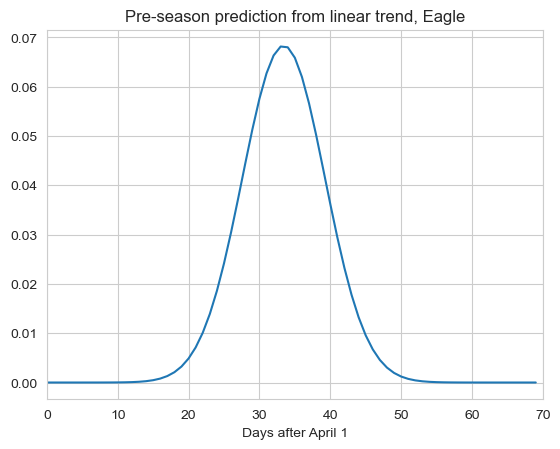

In [ ]:
plt.plot(xs-31, stats.norm.pdf(xs, mu_0, sigma_0))
plt.title(f"Pre-season prediction from linear trend, {location_short}")
plt.xlabel("Days after April 1")
plt.xlim((0,70))

In [ ]:
breakup[breakup['days_since_march1']==65].year.to_list()

[2020]

In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days_after_march_1 in range(30, 80):
    days_from_now_possible = [item-days_after_march_1 for item in possible_days]
    if len(days_from_now_possible) != 0:
        for days in days_from_now_possible:
            days_possible = days + days_after_march_1
            years = breakup[breakup['days_since_march1']==days_possible].year.astype(str).to_list()
            if len(years) == 0: 
                print("This shouldnt happen")
                continue
            print(days_after_march_1, days_possible, mean_eagle[years].mean(axis=1)[days_after_march_1])
            records.append(
                {'forecast_day_past_march1': days_after_march_1,
                    'days_from_then': days,
                    'mean_DD': mean_eagle[years].mean(axis=1)[days_after_march_1]}
            )
likelihoodDF = pd.DataFrame.from_records(records)
likelihoodDF

30 55 82.5
30 56 125.875
30 57 44.333333333333336
30 58 67.0625
30 59 46.36904761904761
30 60 0.0
30 61 124.8125
30 62 26.5
30 63 46.0
30 64 5.0
30 65 37.25
30 66 87.0625
30 67 53.041666666666664
30 68 22.65625
30 69 74.5
30 71 28.5625
30 72 59.708333333333336
30 74 84.0
30 76 26.5
30 77 25.125
30 78 11.5
31 55 82.5
31 56 138.75
31 57 44.333333333333336
31 58 67.75
31 59 51.88095238095239
31 60 0.25
31 61 130.8125
31 62 29.25
31 63 52.09375
31 64 10.4375
31 65 38.375
31 66 91.6875
31 67 56.5
31 68 24.34375
31 69 78.625
31 71 30.50625
31 72 60.84722222222222
31 74 84.0
31 76 26.5
31 77 28.5
31 78 11.5
32 55 82.5
32 56 150.25
32 57 44.5
32 58 69.0625
32 59 57.017857142857146
32 60 1.375
32 61 135.875
32 62 29.25
32 63 59.1875
32 64 15.8125
32 65 41.125
32 66 97.1875
32 67 58.416666666666664
32 68 25.625
32 69 82.875
32 71 32.13125
32 72 62.77777777777778
32 74 84.0
32 76 26.5
32 77 30.25
32 78 11.5
33 55 91.5
33 56 161.625
33 57 45.5
33 58 69.6875
33 59 60.63690476190476
33 60 3.375
33 6

forecast_day_past_march1  days_from_then     mean_DD
0                           30              25   82.500000
1                           30              26  125.875000
2                           30              27   44.333333
3                           30              28   67.062500
4                           30              29   46.369048
...                        ...             ...         ...
1045                        79              -7  530.206667
1046                        79              -5  523.000000
1047                        79              -3  374.500000
1048                        79              -2  311.750000
1049                        79              -1  496.365000

[1050 rows x 3 columns]

In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days_after_march_1 in range(10, 80):
    days_from_now_possible = [item-days_after_march_1 for item in possible_days]
    if len(days_from_now_possible) != 0:
        for days in days_from_now_possible:
            days_possible = days + days_after_march_1
            years = breakup[breakup['days_since_march1']==days_possible].year.astype(str).to_list()
            if len(years) == 0: 
                print("This shouldnt happen")
                continue
            for year in years:
                # print(year, days_after_march_1, mean_eagle[year][days_after_march_1])
                records.append({
                    'forecast_day_past_march1': days_after_march_1,
                    'year': year,
                    'days_from_then': days,
                    'mean_DD': mean_eagle[year][days_after_march_1]}
                )
likelihoodDF = pd.DataFrame.from_records(records)
likelihoodDF['day_absolute_since_march_1'] = likelihoodDF['forecast_day_past_march1'] + likelihoodDF['days_from_then']
likelihoodDF['forecastdate'] = likelihoodDF['forecast_day_past_march1'].apply(dayssince2date)
likelihoodDF

forecast_day_past_march1  year  days_from_then     mean_DD  \
0                           10  1990              45   28.000000   
1                           10  2016              46   14.750000   
2                           10  2003              47   20.833333   
3                           10  1991              48    7.000000   
4                           10  2005              48   30.875000   
...                        ...   ...             ...         ...   
3075                        79  2023              -7  539.000000   
3076                        79  1982              -5  523.000000   
3077                        79  1985              -3  374.500000   
3078                        79  2013              -2  311.750000   
3079                        79  2002              -1  496.365000   

      day_absolute_since_march_1 forecastdate  
0                             55        03-11  
1                             56        03-11  
2                             57        03-11  
3                             58        03-11  
4                             58        03-11  
...                          ...          ...  
3075                          72        05-19  
3076                          74        05-19  
3077                          76        05-19  
3078                          77        05-19  
3079                          78        05-19  

[3080 rows x 6 columns]

In [ ]:
likelihoodDF[(likelihoodDF.forecast_day_past_march1==55) & (likelihoodDF['year']=='2022')]['mean_DD'].squeeze()

203.875

In [ ]:
mean_eagle['2000'][65]

395.125

In [ ]:
ru.dayssince2date(30, 2022)

datetime.date(2022, 3, 31)

In [ ]:
np.arange(startidx, endidx+1)

array([101, 102, 103, 104, 105, 106, 107])

36.92983771074354 37.0 8.02484389886974 41 3.4576451701438168e-06 6.901488699487214e-05 0.001667462937735809 0.018504426408707187


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


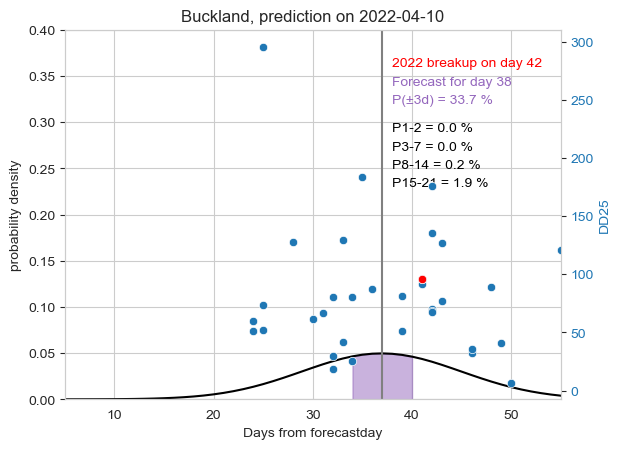

35.99111855173661 36.0 8.017483533996261 40 5.73093969326504e-06 0.0001079240473299637 0.002383380731450555 0.024092602653318022


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


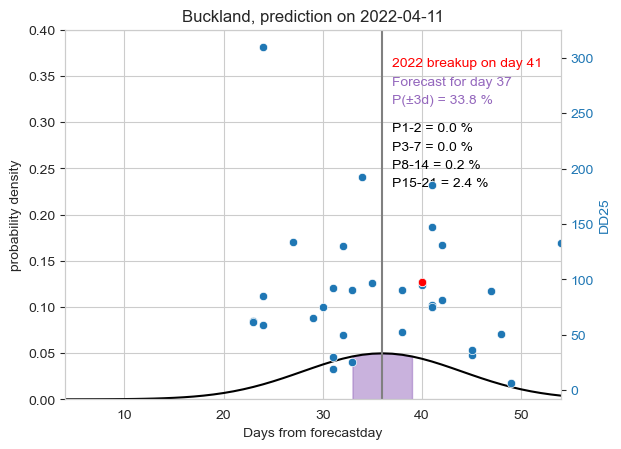

34.989365357918885 35.0 7.992902171121038 39 9.352100547302463e-06 0.00016699517074138297 0.003388513856480535 0.03127261333167505


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


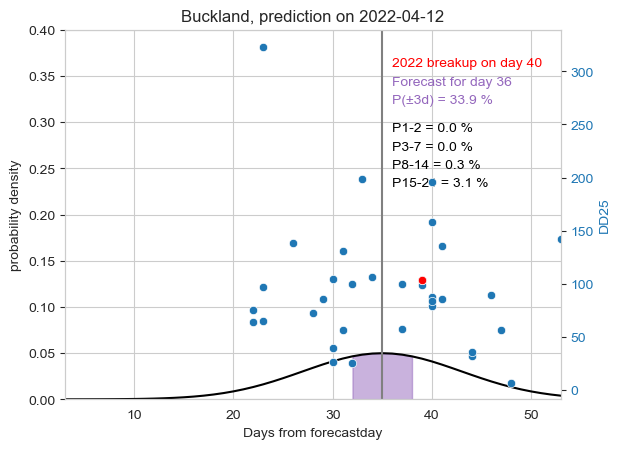

34.00548974609131 34.0 7.947221722793509 38 1.433019553526177e-05 0.0002454922303551148 0.0046459748455407075 0.039604129936179


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


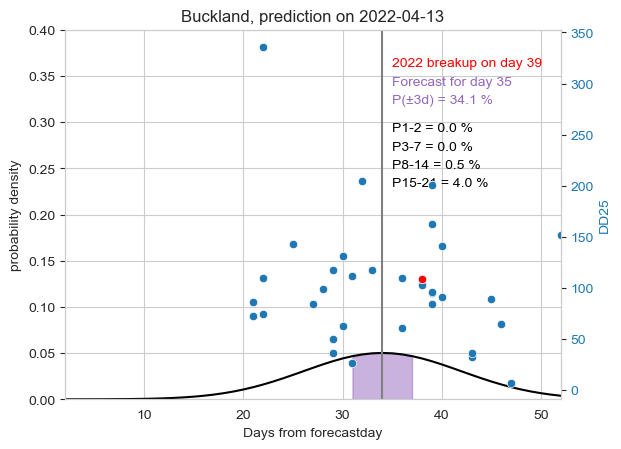

33.0874774313901 33.0 7.903187527497909 37 2.1182371045446946e-05 0.0003490556823630773 0.006186882744741903 0.048926398551016846


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


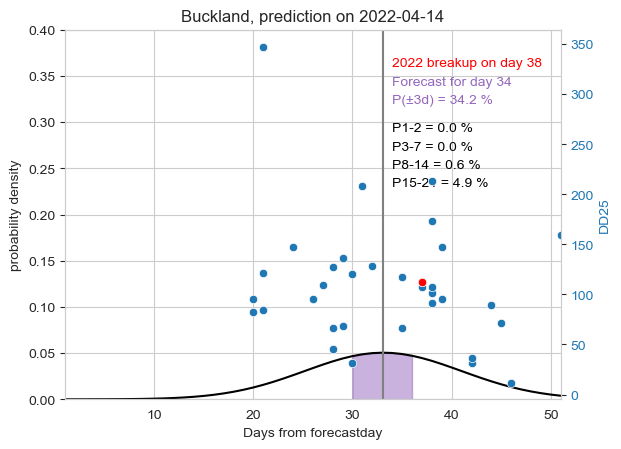

32.17984886878055 32.0 7.877158407561762 36 3.209854697369789e-05 0.0005040923738709395 0.008269860785257944 0.06011675468821668


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


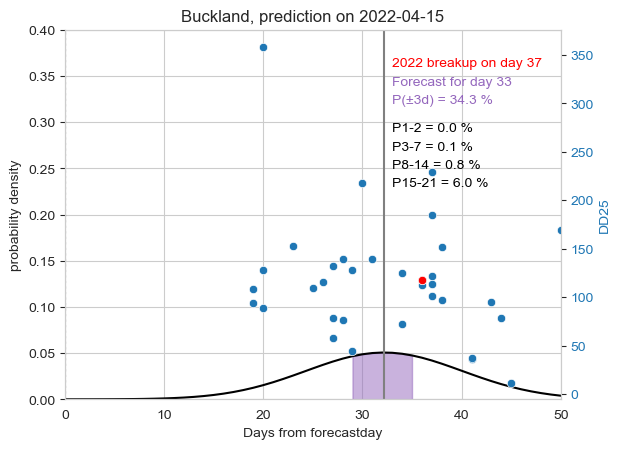

31.300316545331107 31.0 7.847805807441404 35 4.731235227568003e-05 0.0007102733236858323 0.0108297340270598 0.07262213497527062


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


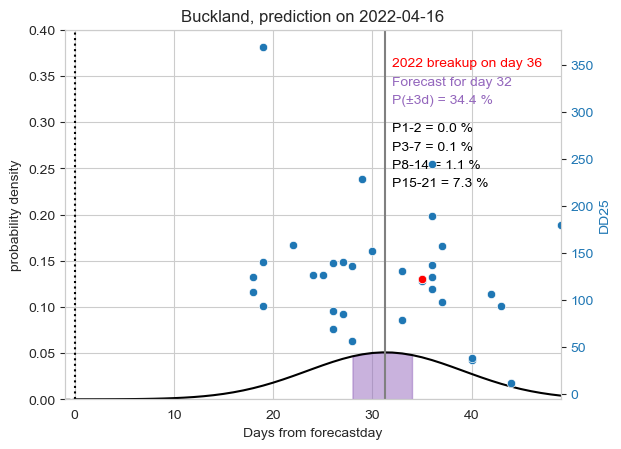

30.421161425772144 30.0 7.833730036328124 34 7.111561603092167e-05 0.0010125662112281297 0.01420592982777826 0.08719430550707381


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


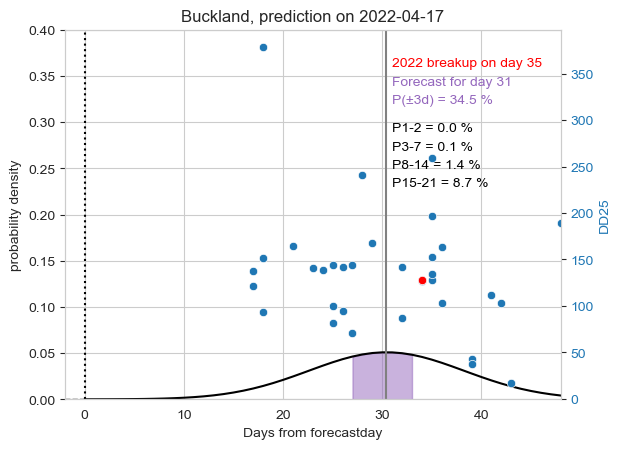

29.57384078863584 30.0 7.808144488510279 33 0.00010234937724169702 0.0013923303953311773 0.018147329302951484 0.10274316089379805


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


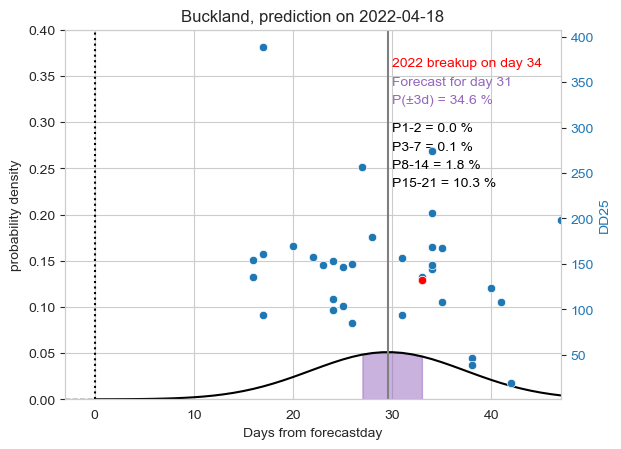

28.73222151803386 29.0 7.780920723953523 32 0.0001455316873571177 0.0018927939595167523 0.022935889009337827 0.1198143566289042


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


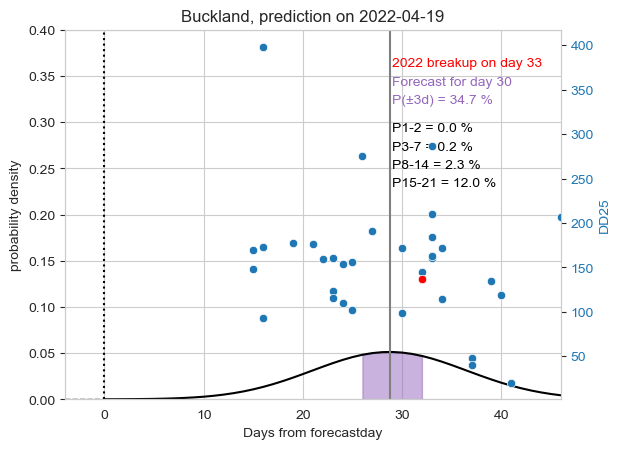

27.916189349241982 28.0 7.7797336891592295 31 0.00021107636428098573 0.0025979222925198754 0.028913165475730487 0.13823132342483496


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


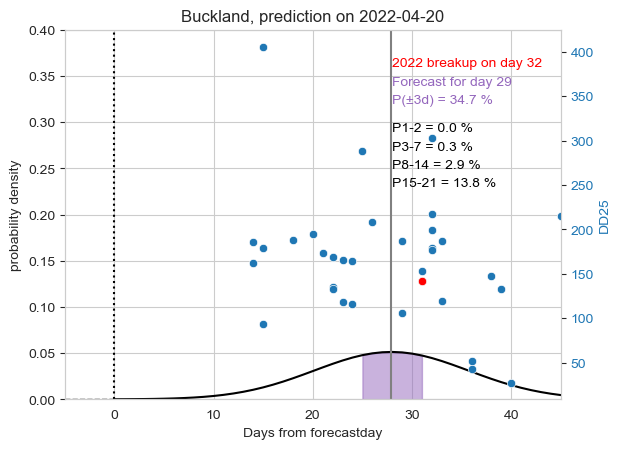

27.061331551324326 27.0 7.779554807065911 30 0.0003084904267372259 0.003582899305132254 0.036464823328172996 0.15882463035665478


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


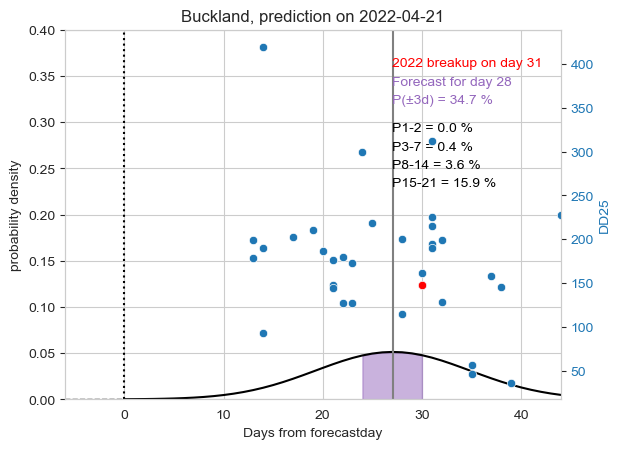

26.08993829815178 26.0 7.7597956361568645 29 0.0004565919743641089 0.00500585528433325 0.04648297341404549 0.18331737615334642


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


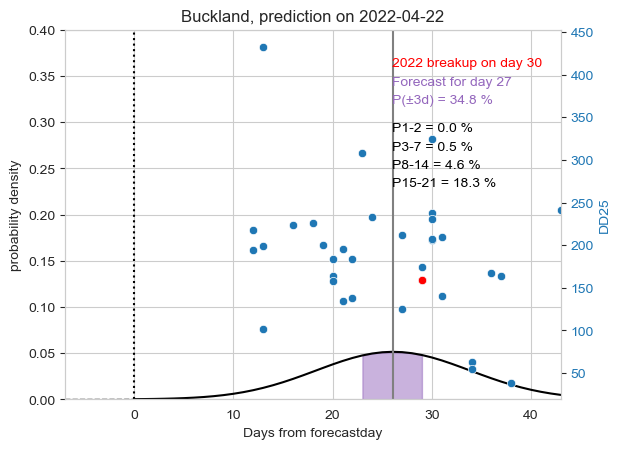

25.108505079933693 25.0 7.707154603293542 28 0.0006453337599608131 0.006758891698309229 0.05805514195364411 0.20901591894583205


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


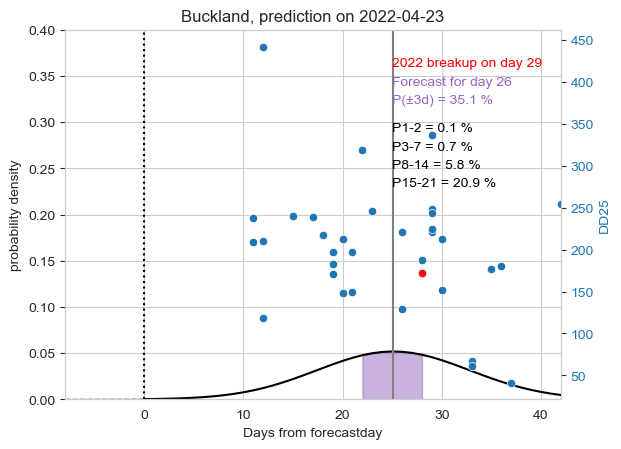

24.09990123062644 24.0 7.644020618515728 27 0.000905630313331637 0.009069862086138667 0.07205408606231993 0.23625470080589603


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


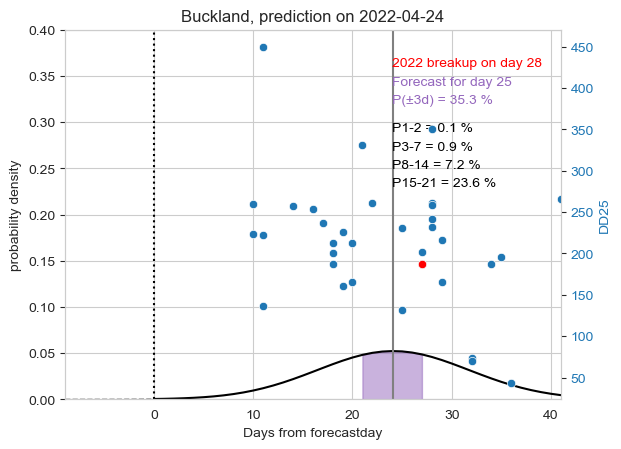

23.028736083518954 23.0 7.57941557947333 26 0.0012929738579895594 0.012316316870254761 0.0897200216449699 0.2653103099950067


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


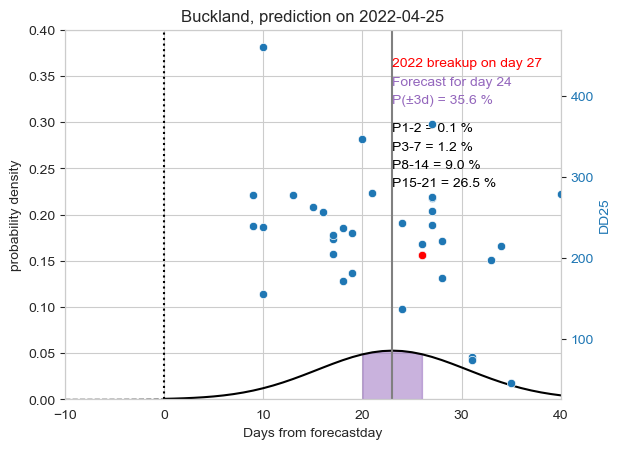

22.00464268519951 22.0 7.531383292434495 25 0.0018284335254287506 0.016494061610668673 0.10968834888882073 0.2919485409840023


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


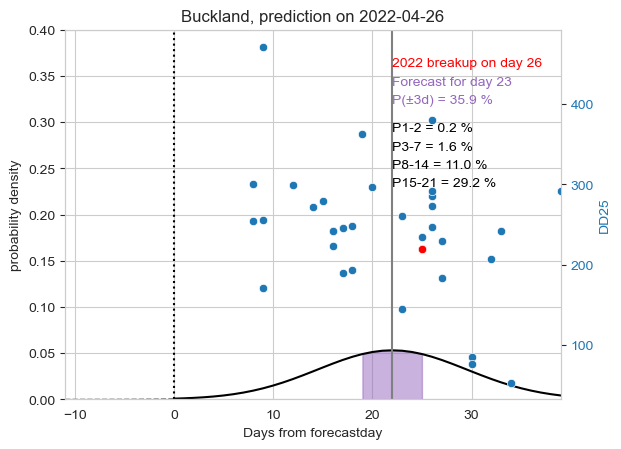

20.972649349322374 21.0 7.496336738340059 24 0.002597800867533827 0.022054341056589582 0.13284119461473867 0.31625916953401667


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


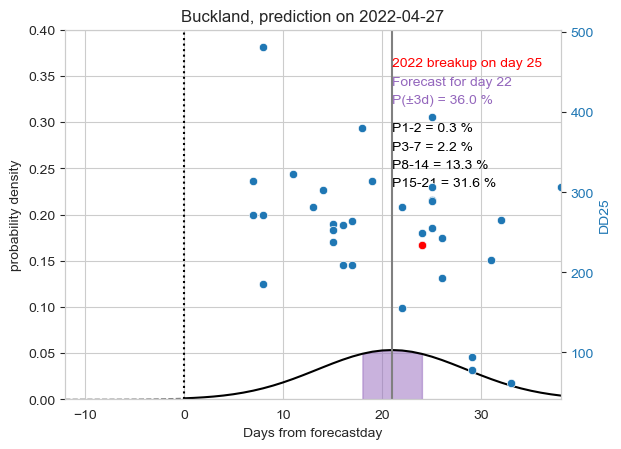

19.956010697525954 20.0 7.471844419732485 23 0.0036568164894219875 0.02912377522688233 0.1583371926457026 0.3364711572669439


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


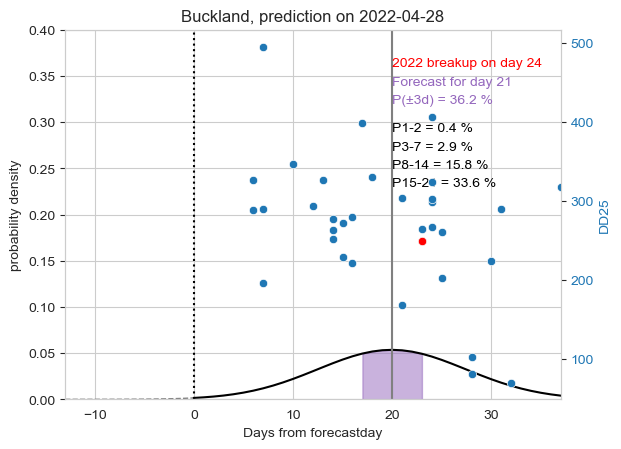

18.973757980855655 19.0 7.418257113121667 22 0.0049197772744112985 0.03716554832836465 0.18471016653456424 0.3529594725403509


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


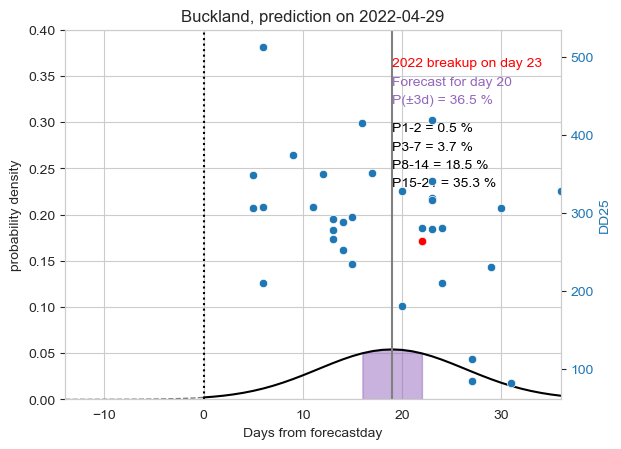

18.010297282078675 18.0 7.34932130614484 21 0.006460257582766436 0.04650482169525445 0.21227999919895493 0.365296349993459


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


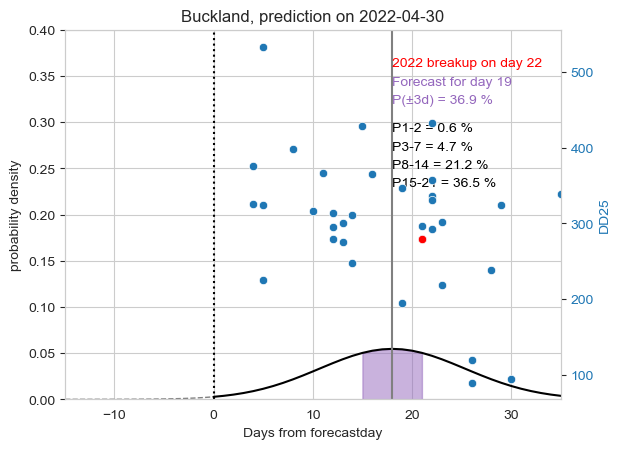

16.933027723078837 17.0 7.3053171398096985 20 0.008857707704238198 0.05972259072289007 0.2446755083869028 0.37153197359201345


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


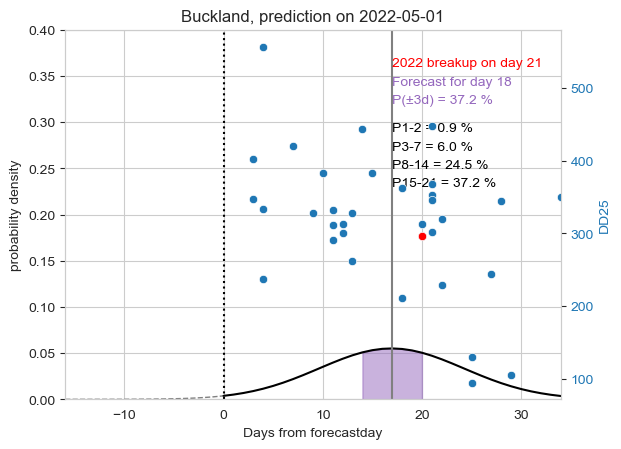

15.897773067527327 16.0 7.24589211741239 19 0.011749441931600133 0.07464740686911875 0.276363515326126 0.3716148041476686


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


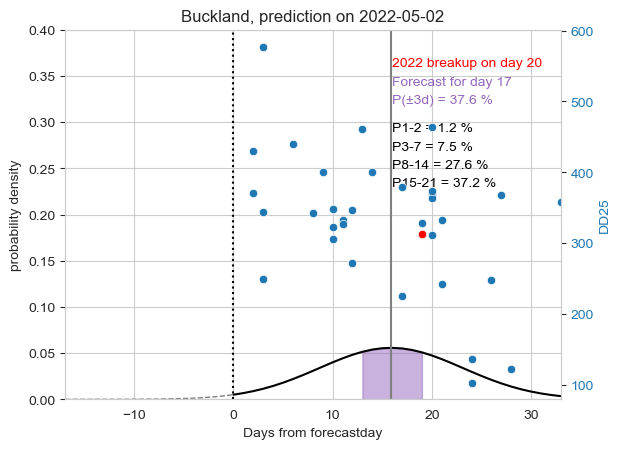

14.867005379818462 15.0 7.16292328599124 18 0.01525474419573648 0.09174491498539211 0.30796537509940397 0.3659263367722123


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


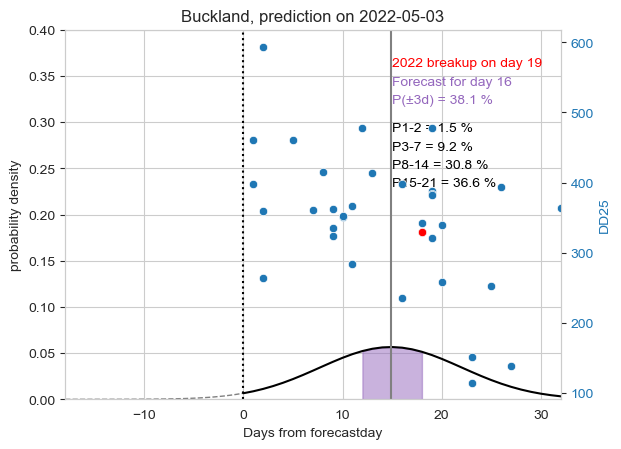

13.825558910132912 14.0 7.113158281279567 17 0.019957474518908627 0.11236121318398765 0.3377984539448259 0.35214637640779306


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


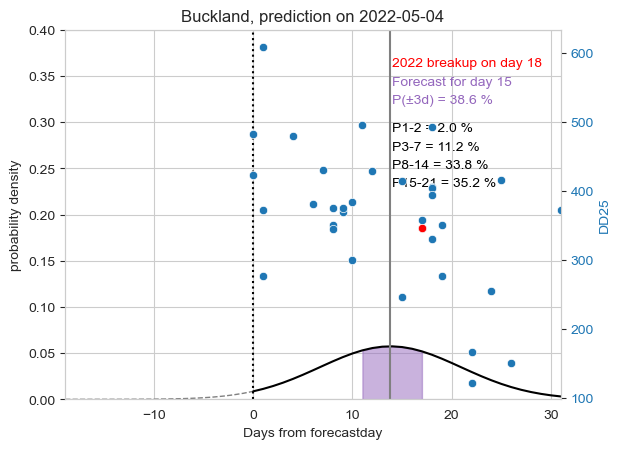

12.744399905084117 13.0 7.050016444137717 16 0.025952450580636353 0.13657161051666267 0.3660251522028341 0.3318090144637622


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


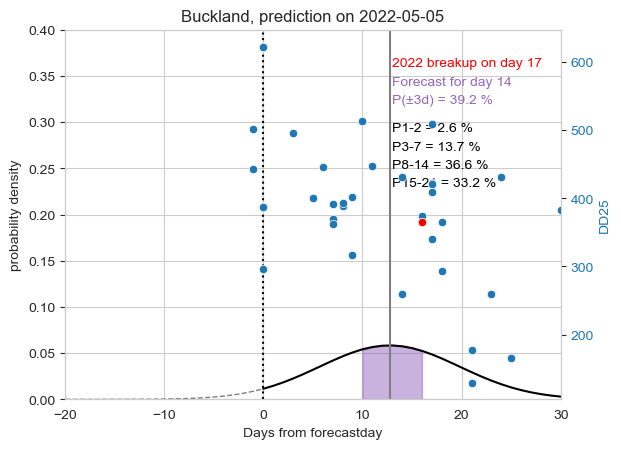

11.68460140940414 12.0 7.003695292524718 15 0.03331493387550999 0.1632654817759145 0.38884231518858736 0.30627617159714415


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


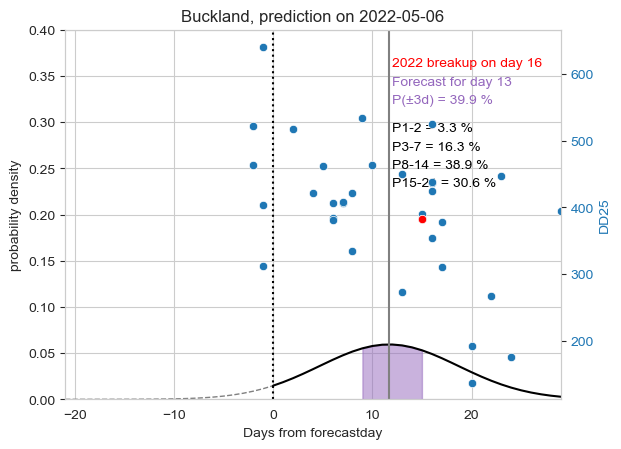

10.69838112855852 11.0 6.951617520874226 14 0.04146169733680227 0.19024093332922676 0.4055700664529412 0.2791674324719745


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


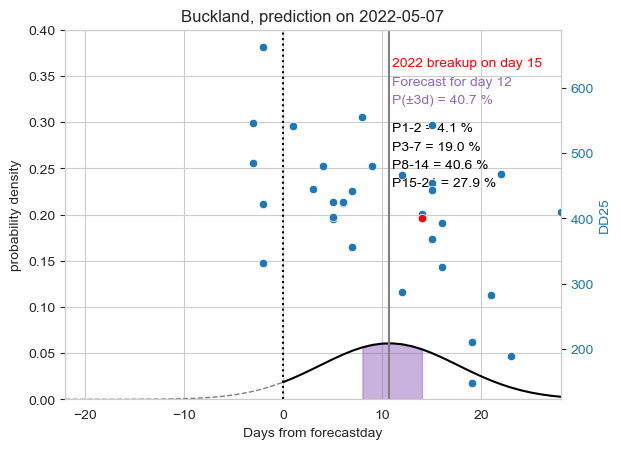

9.774403914429815 10.0 6.889344499525744 13 0.05030814961291902 0.21719855938340485 0.41694370166239575 0.2516258141601014


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


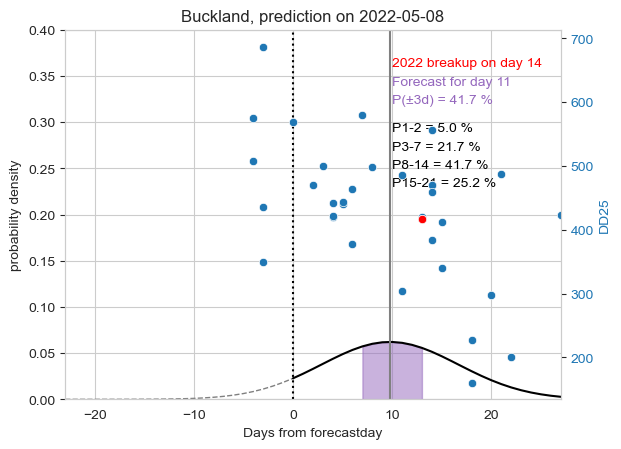

8.893394953360502 9.0 6.795201479099167 12 0.0598128837362039 0.24449598896229213 0.4243914184324943 0.22366490147396442


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


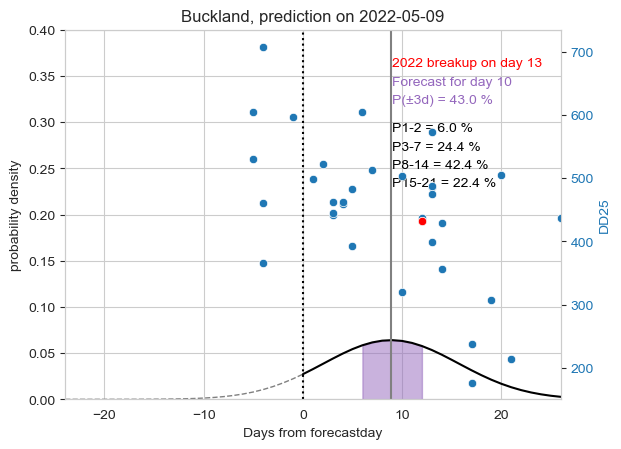

8.125232785370859 8.0 6.67761303264568 11 0.06907846514127358 0.26988721771398905 0.42796378598997237 0.19780913378648826


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


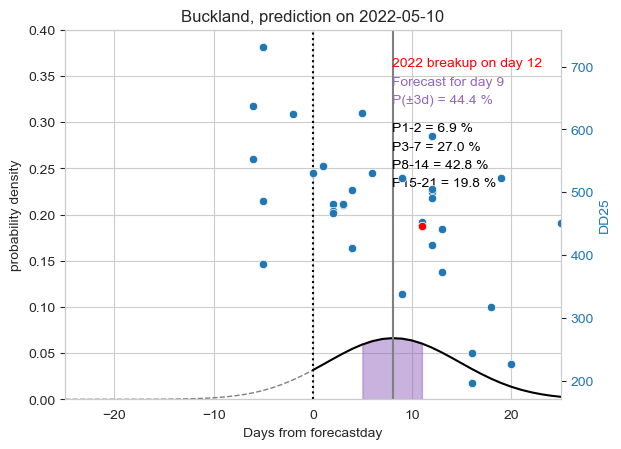

7.376097037121653 7.0 6.56296045836612 10 0.07935445167889649 0.29574030898133086 0.42703337668020314 0.1722697187300176


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


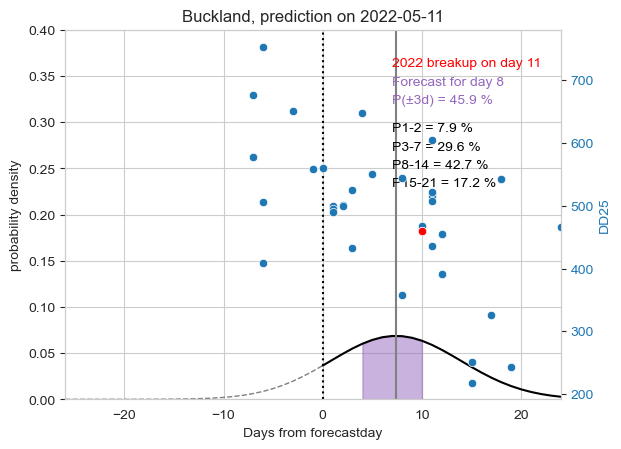

6.590447049523831 7.0 6.440223613073093 9 0.091577993854277 0.3237582140293682 0.42112996473202985 0.14582952299761742


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


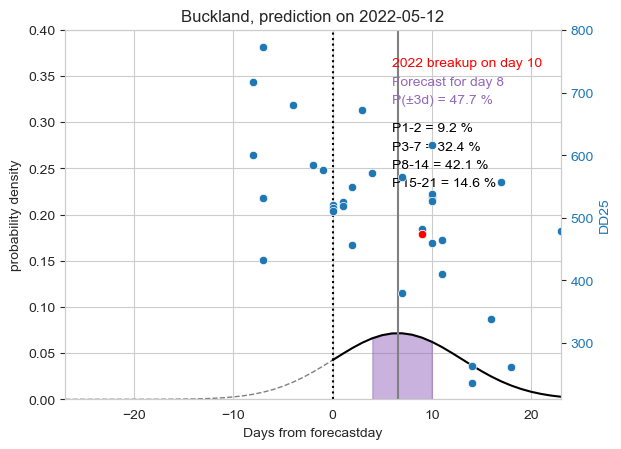

5.70010139472204 6.0 6.378687967546037 8 0.1073746589873561 0.3534624921127165 0.4068259784585396 0.12023630863979932


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


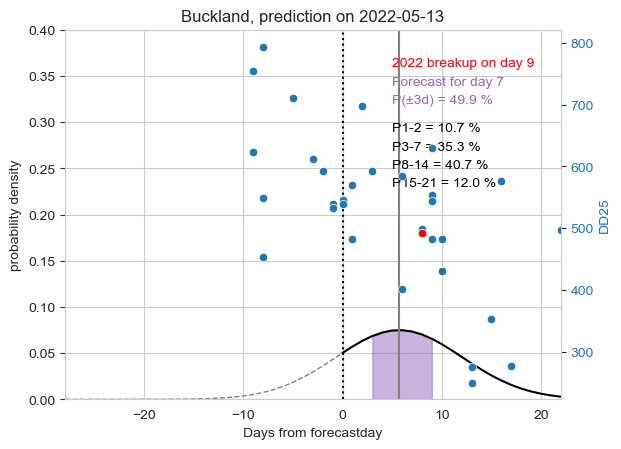

4.794818202244841 5.0 6.3566433046073065 7 0.12501350807583617 0.3809505928451247 0.3872349604023351 0.09840914590317916


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


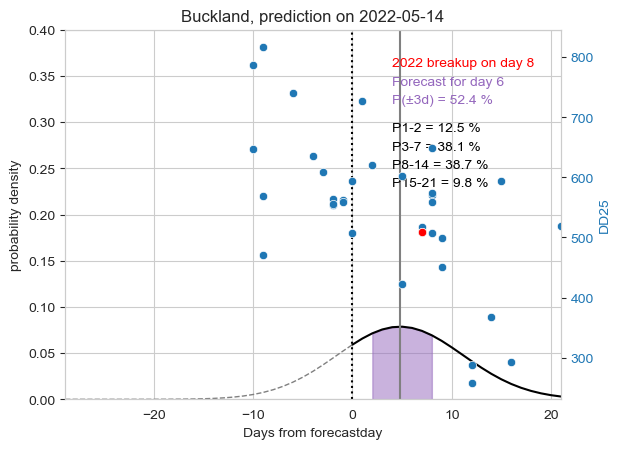

3.8636094017564737 4.0 6.378399330311031 6 0.14418691909422632 0.4050777658364133 0.3641473870253645 0.08059401537011239


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


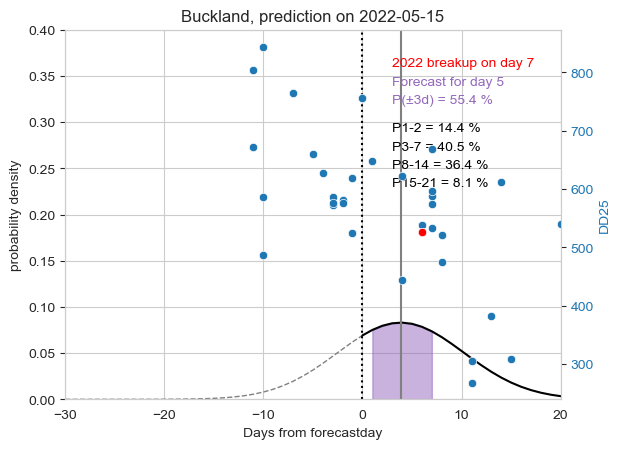

2.938076682393479 3.0 6.391428041859947 5 0.16424713109024766 0.426505385857487 0.33967014056166506 0.06535686775509786


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


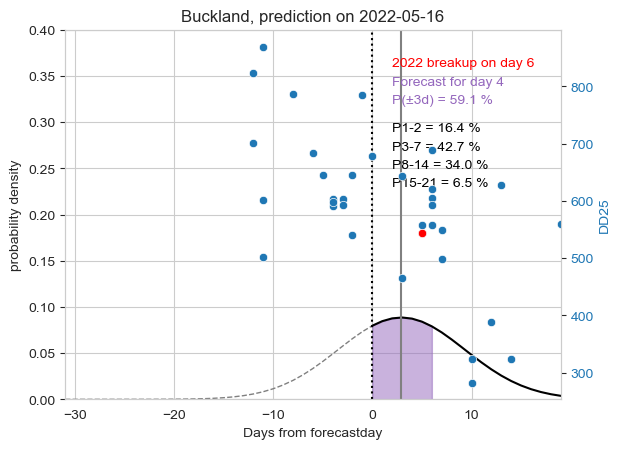

1.93997815531133 2.0 6.390046708485928 4 0.1870679595499358 0.44689092992222684 0.3119813276307653 0.05125216679655446


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


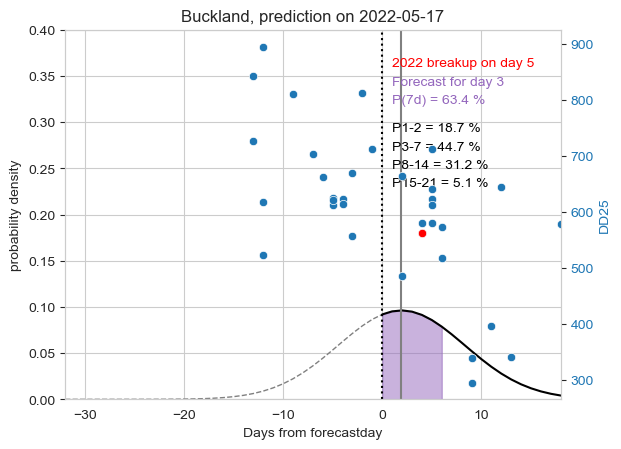

0.8863123955787486 1.0 6.400105070892506 3 0.21177292548715515 0.46395687017874243 0.28286641807244345 0.03956273351150185


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


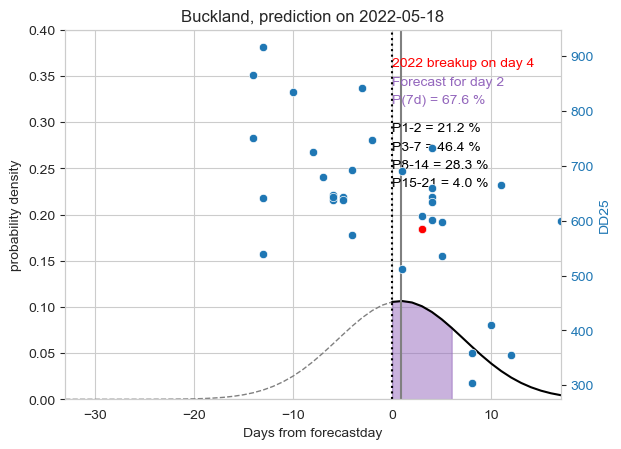

-0.20486825959092414 -0.0 6.421742266904347 2 0.23754729839536187 0.4769722981674885 0.2539808083286097 0.030294772238736792


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/592230274.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


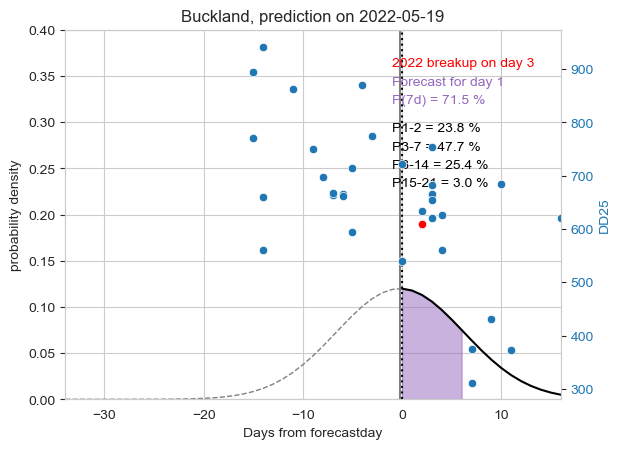

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [ ]:
xs = np.arange(-101, 101)
year = 2022
for_ffmpeg = True

icount = 1
for ii in range (40, 90, 1):
    breakup_avg_model = linear_model.LinearRegression() 
    DF = likelihoodDF[likelihoodDF.forecast_day_past_march1==ii].copy()
    DDval = DF[DF['year']==str(year)]['mean_DD'].squeeze()
    breakup_avg_model.fit(DF[['mean_DD']].values, DF[['days_from_then']].values)
    mu_0 = breakup_avg_model.predict([[DDval]]).item()
    sigma_0 = mean_squared_error([breakup_avg_model.predict([[dd]]).item() for dd in DF['mean_DD'].tolist()],
                   DF['days_from_then'].tolist(), squared=False)

    # normalize on > 0 values
    pdf = stats.norm.pdf(xs, mu_0, sigma_0)/stats.norm.pdf(xs[101:], mu_0, sigma_0).sum()
    prob_12 = pdf[101:103].sum()
    prob_37 = pdf[103:108].sum()
    prob_wk2 = pdf[108:115].sum()
    prob_wk3 = pdf[115:122].sum()
    breakup_2022 = DF[DF.year==str(year)]['days_from_then'].squeeze()
    forecastdate = ru.dayssince2date(ii, year)
    print(mu_0, np.round(mu_0), sigma_0, breakup_2022, prob_12, prob_37, prob_wk2, prob_wk3)
    fig, ax1 = plt.subplots()
    ax1.plot(xs[:102], pdf[:102], linestyle='dashed', color='grey', linewidth=1)
    ax1.plot(xs[101:], pdf[101:], color='black')
    ax1.vlines(0, 0, 0.4, colors='black', linestyles='dotted')
    # Add most likely +/- 3 days
    mostlikely = int(np.round(mu_0) + 1)
    ax1.vlines(mu_0, 0, 0.4, colors='grey')
    startidx = max(101, 100 + mostlikely-3)
    endidx = startidx + 6
    shiftflag = False   # do we have to shift the +/- 3 day window?
    if  100 + mostlikely-3 < 101:
        shiftflag = True
    plusminus3daysprob = pdf[startidx:endidx+1].sum()
    ax1.fill_between(xs[startidx:endidx+1], pdf[startidx:endidx+1], color='tab:purple', alpha=0.5)
    ax1.text(78-ii, .36, f"{year} breakup on day {breakup_2022+1}", color='red')
    ax1.text(78-ii, .34, f"Forecast for day {mostlikely}", color='tab:purple')
    if shiftflag: 
        textsnippet = "7d"
    else:
        textsnippet = "±3d"
    ax1.text(78-ii, .32, f"P({textsnippet}) = {plusminus3daysprob*100:.1f} %", color='tab:purple')
    ax1.text(78-ii, .29, f"P1-2 = {prob_12*100:.1f} %", color='black')
    ax1.text(78-ii, .27, f"P3-7 = {prob_37*100:.1f} %", color='black')
    ax1.text(78-ii, .25, f"P8-14 = {prob_wk2*100:.1f} %", color='black')
    ax1.text(78-ii, .23, f"P15-21 = {prob_wk3*100:.1f} %", color='black')
    ax1.set_ylim((0, 0.40))
    ax1.set_ylabel('probability density')
    ax1.set_xlabel("Days from forecastday")
    ax2 = ax1.twinx()
    color = 'tab:blue'
    sns.scatterplot(data=DF, x='days_from_then', y='mean_DD', ax=ax2)
    sns.scatterplot(data=DF[DF.year==str(year)], x='days_from_then', y='mean_DD', ax=ax2, color='red')
    ax2.set_ylabel('DD25', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid(b=None)
    plt.title(f"{location_short}, prediction on {forecastdate}")
    plt.xlim((45-ii, 95-ii))

    plt.show()
    loc = location_short.upper().replace(' ', '_')
    if not for_ffmpeg:
        fig.savefig(outfolder / f"{loc}_DD25_{year}_{forecastdate}.png", bbox_inches='tight')
    else:
        fig.savefig(outfolder / f"{loc}_DD25_{year}_{icount:02d}.png", bbox_inches='tight')
        icount += 1 
    if breakup_2022 == 0: break

28.321665374204592 28.0 5.436917619693787 32 3.350087588180915e-07 2.880058398559998e-05 0.003137896404657125 0.07167415520560484


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


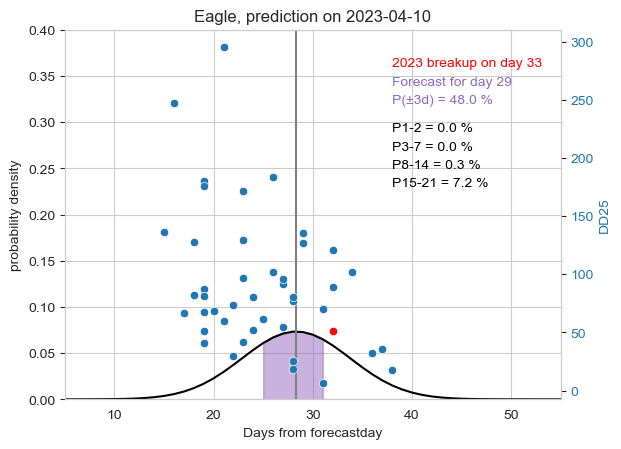

27.530144605628195 28.0 5.379234510540763 31 5.397451029552184e-07 4.4548329803745885e-05 0.004456004381922073 0.09080141490450358


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


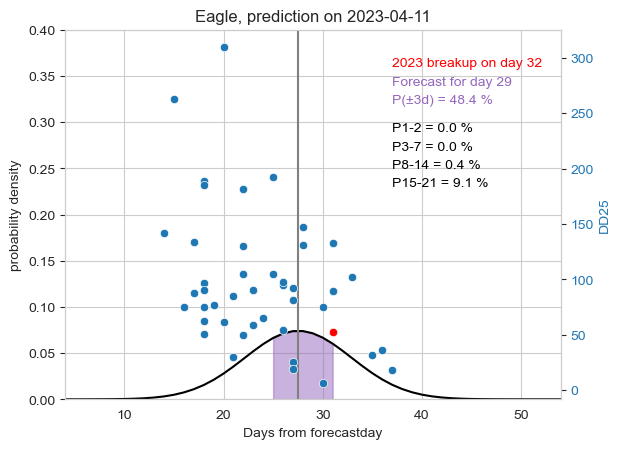

26.64154861792883 27.0 5.309751149335495 30 9.04906972386613e-07 7.160781018883508e-05 0.0065214347636195005 0.11676271219839618


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


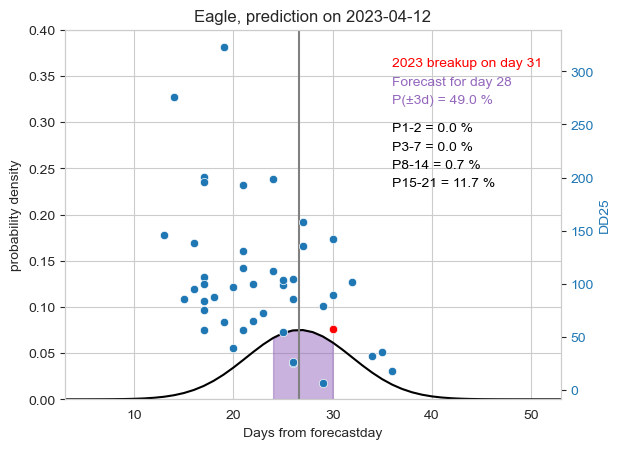

25.855127626373505 26.0 5.222886708501072 29 1.2875460435816419e-06 0.00010151961234836627 0.00881044762681572 0.14332265325853144


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


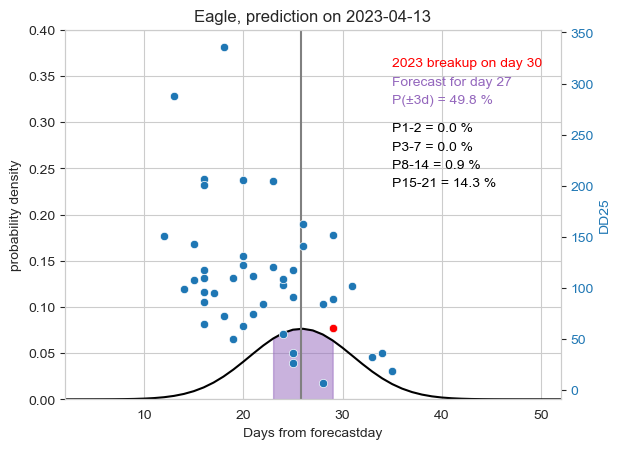

25.02651935744748 25.0 5.136845464347057 28 1.9238512421977317e-06 0.00014950885250078504 0.012154211345943987 0.17642508603120166


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


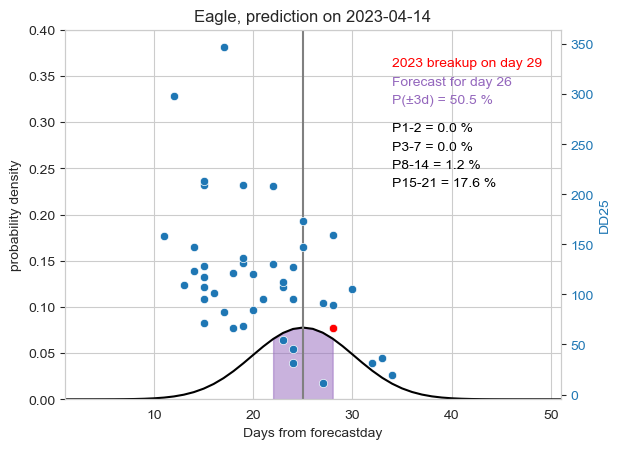

24.14064179027981 24.0 5.076752394184153 27 3.386155321023295e-06 0.00024636112609306617 0.017642729141829818 0.2183983868267207


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


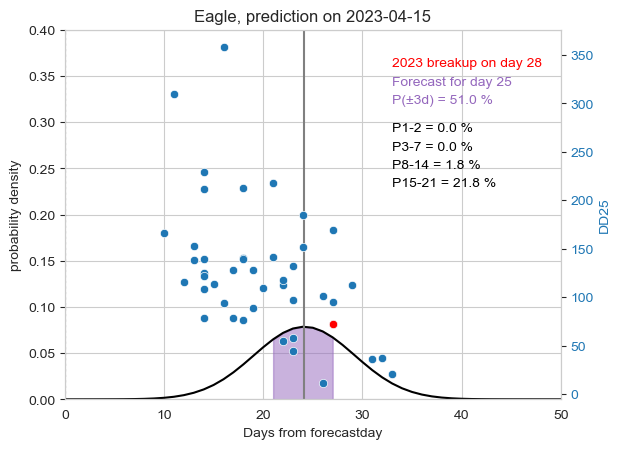

23.28274141662067 23.0 4.992468275012067 26 5.28755489323899e-06 0.0003734358691225019 0.02445608556040222 0.2634765039305108


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


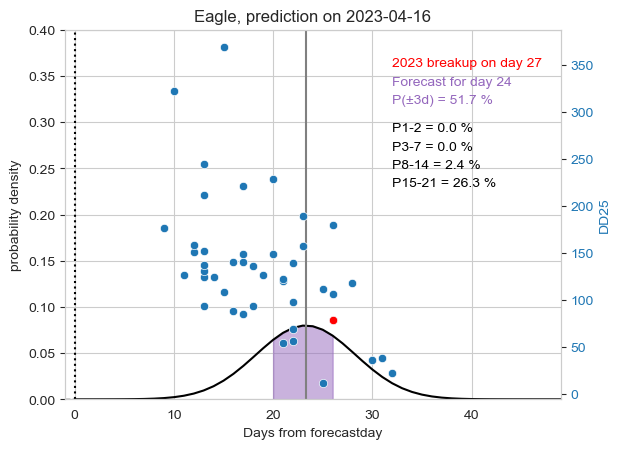

22.32321205090131 22.0 4.934391623170759 25 1.002975345438246e-05 0.0006467665594151993 0.0359742420931477 0.3190123657206009


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


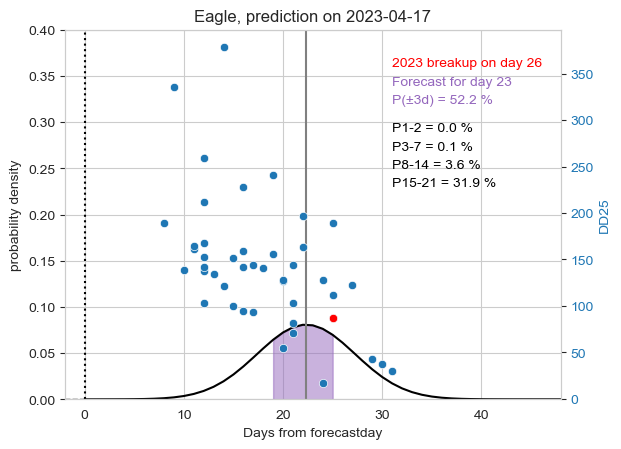

21.476921583283005 21.0 4.8865884774936 24 1.7772273040122757e-05 0.0010483022190351807 0.049927281212229446 0.3696398017100893


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


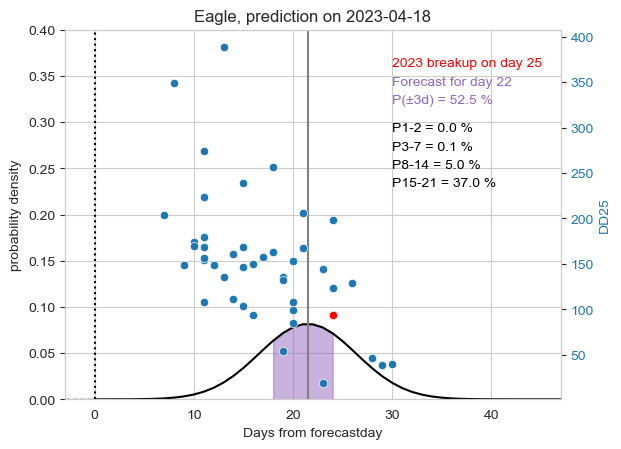

20.692113806392527 21.0 4.817267555890818 23 2.7636128086225157e-05 0.001548894044370332 0.06578779243177779 0.4166986233316661


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


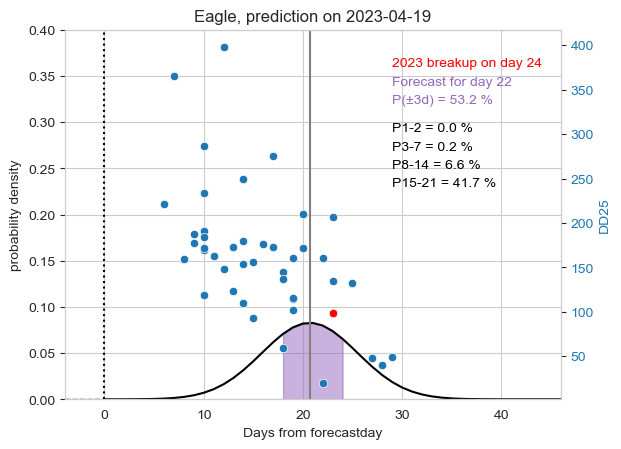

19.900034284442327 20.0 4.759859852399431 22 4.501852353703945e-05 0.0023444200974508953 0.08658215312423247 0.4612691699772307


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


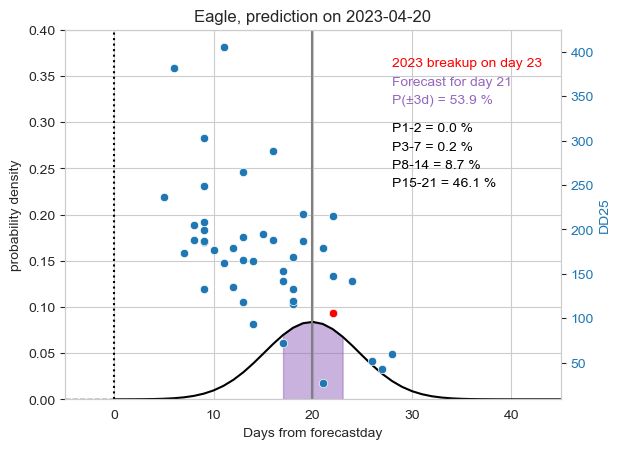

18.927842084444883 19.0 4.721021402708702 21 8.975826944574075e-05 0.004069123692753613 0.12051106314384902 0.5059964828417888


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


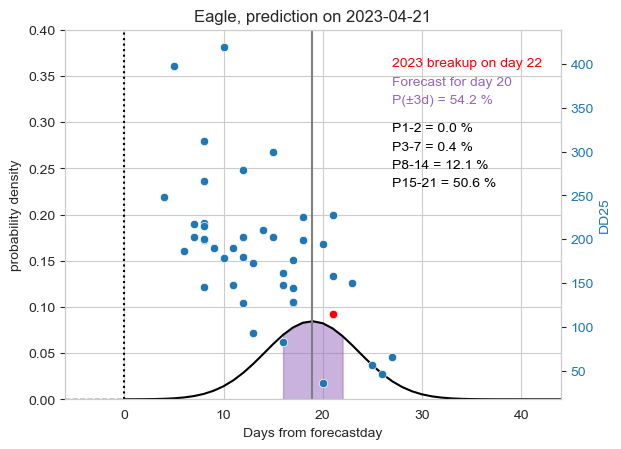

18.040544701926464 18.0 4.642216938474811 20 0.00014706991660516468 0.006194228755137076 0.15717631549612648 0.5387048337046022


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


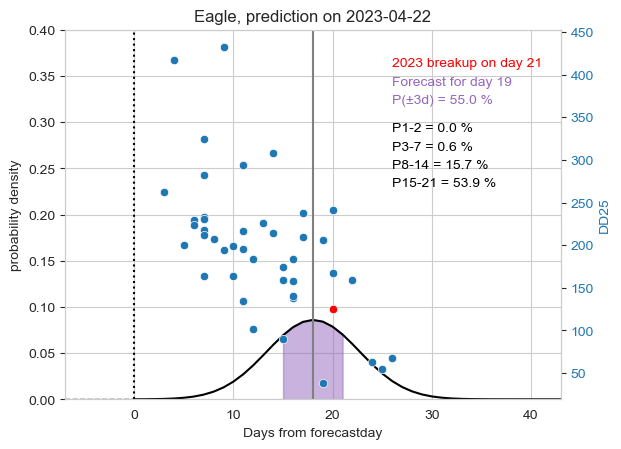

17.470158634533426 17.0 4.532150973364385 19 0.0001716110325228496 0.007438135312638627 0.18239231827587102 0.558522951062171


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


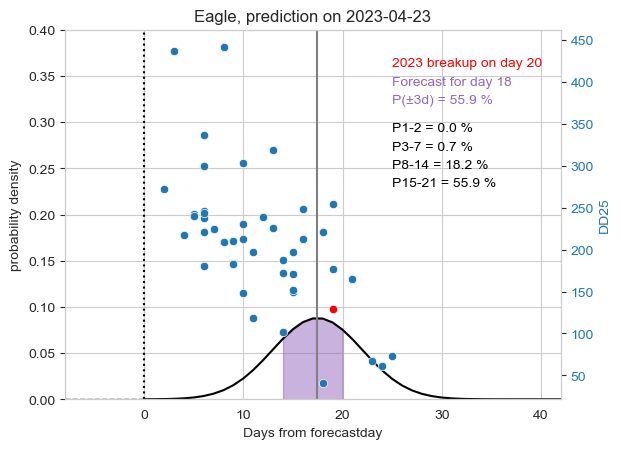

16.968946027047675 17.0 4.429270940907795 18 0.00019407330330900122 0.008695048802607457 0.20734923278691342 0.5715818835939631


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


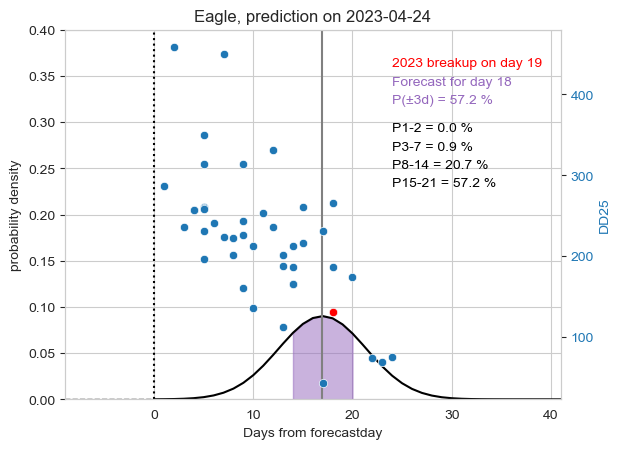

16.33885449872961 16.0 4.314841837283853 17 0.00023782290905277246 0.01086292167035114 0.24368228721988552 0.578324082487344


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


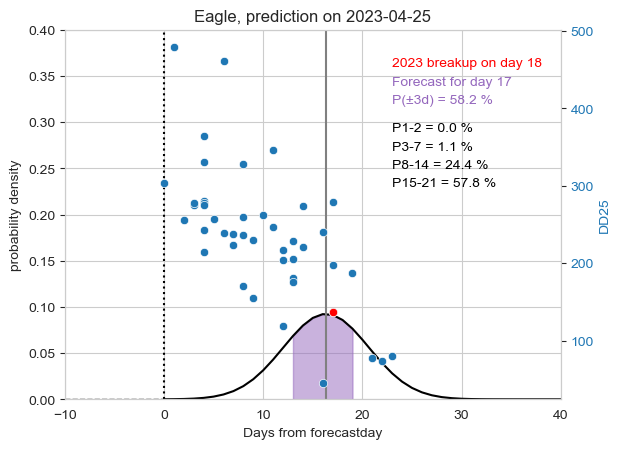

15.662842901407657 16.0 4.188669069293369 16 0.00029553272684988403 0.013813401688749522 0.2882256728168891 0.574139672931109


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


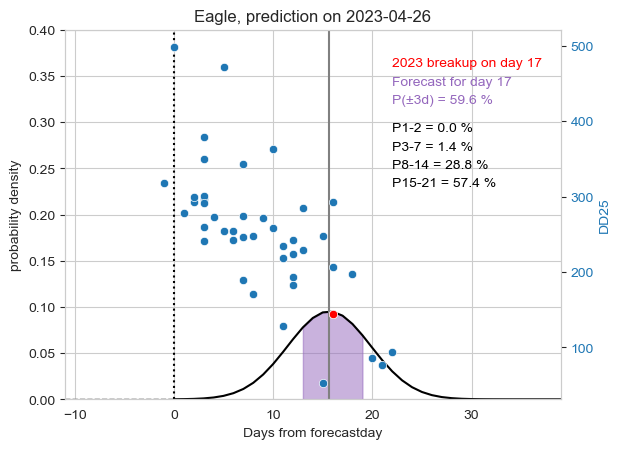

14.853463867189372 15.0 4.0771356250436455 15 0.00043287212652374645 0.019476238687706635 0.34968279518192136 0.5478959326717724


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


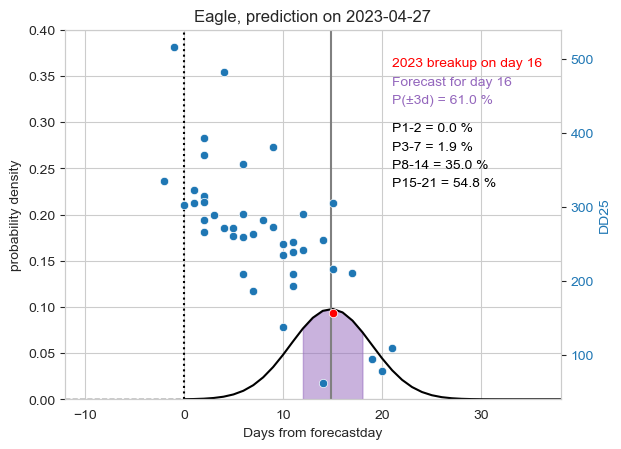

13.930696741183908 14.0 3.99258740441774 14 0.0007543617034546697 0.030125254524945487 0.4259768789052098 0.49363347323042134


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


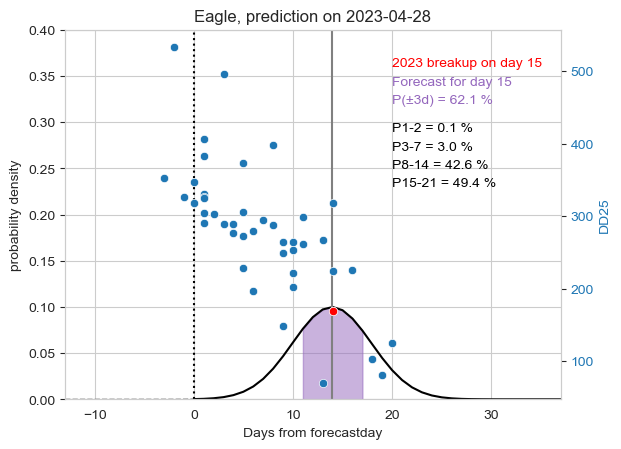

13.093318213882164 13.0 3.922835944475899 13 0.0012660190558915086 0.04445297960399697 0.4955601774511988 0.4295493918869134


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


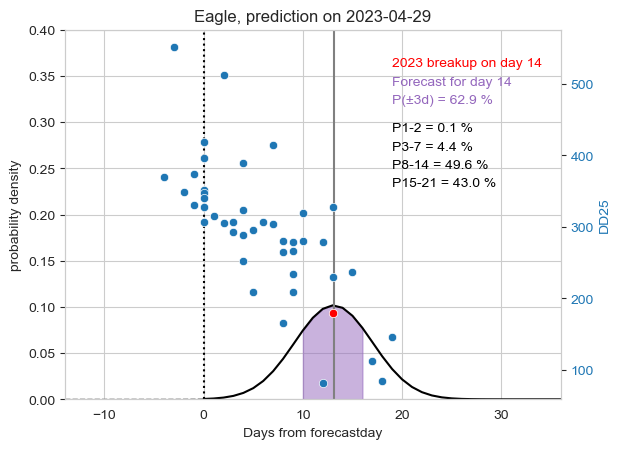

12.080165758639673 12.0 3.85191125004238 12 0.002412673625342263 0.07024253148722168 0.5713337854115673 0.3418153101016032


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


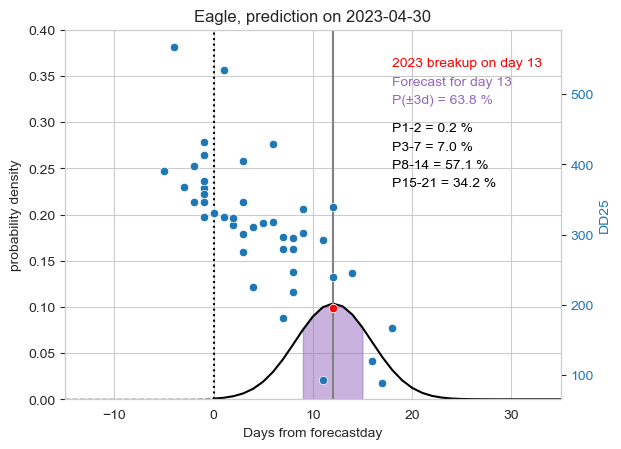

11.01707883662477 11.0 3.800730833355081 11 0.00483398636337001 0.11076210910978385 0.6279203259950984 0.25030573179094706


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


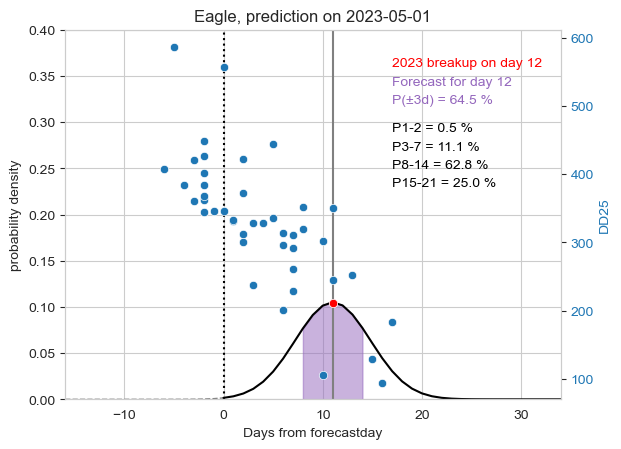

9.988387395238945 10.0 3.709519827651387 10 0.008595703955057345 0.16228648062005402 0.6575508975693494 0.16932217152272822


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


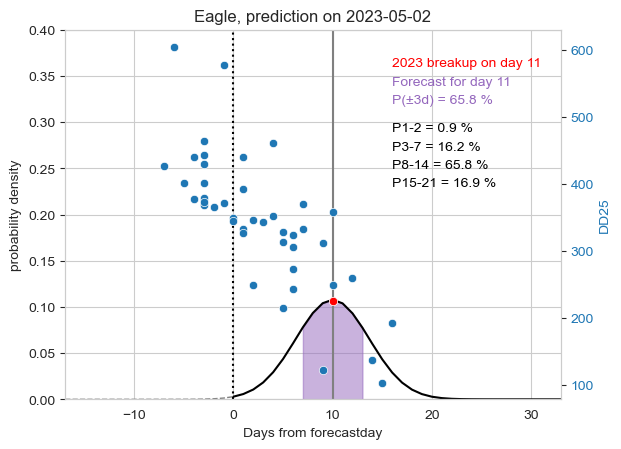

9.234389294656175 9.0 3.617860341845583 9 0.012558411335182616 0.20889452116216178 0.6596933321722711 0.11795797780770965


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


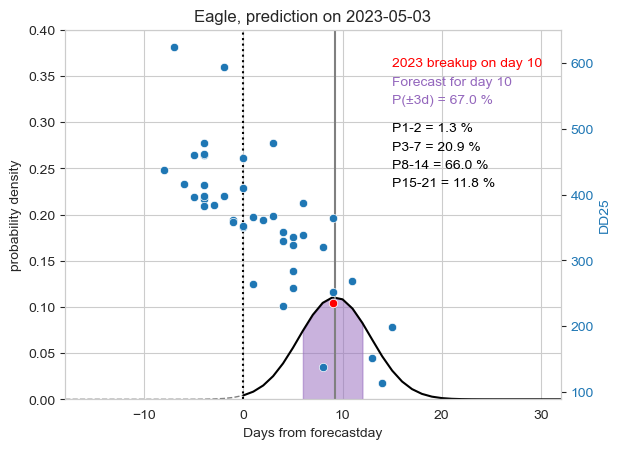

8.388791121085593 8.0 3.5452183467187623 8 0.019788390770790157 0.27248724768601174 0.6332670216948844 0.07415096440559114


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


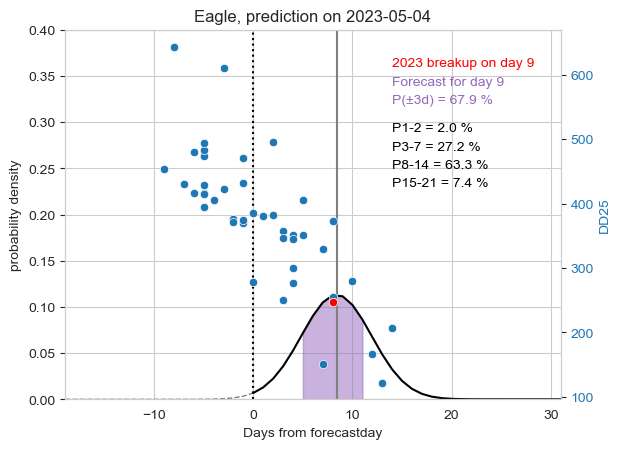

7.509648427089584 8.0 3.4822901583599144 7 0.03149253849437241 0.3475362658654106 0.5783659231209971 0.04251345967989469


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


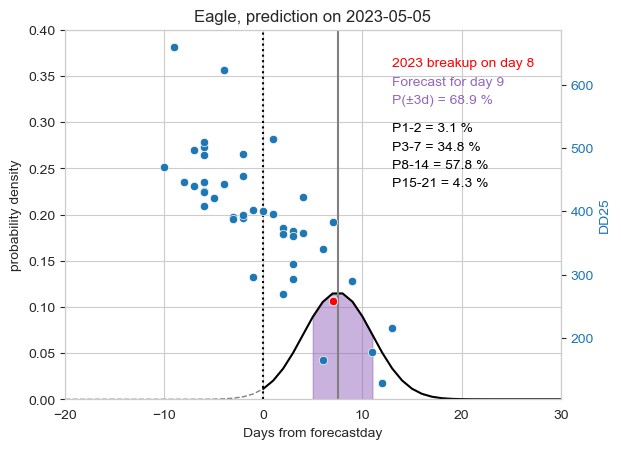

6.535173250833946 7.0 3.457344458487301 6 0.05244441118872501 0.43289250314989314 0.4925978993676844 0.02203939452276206


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


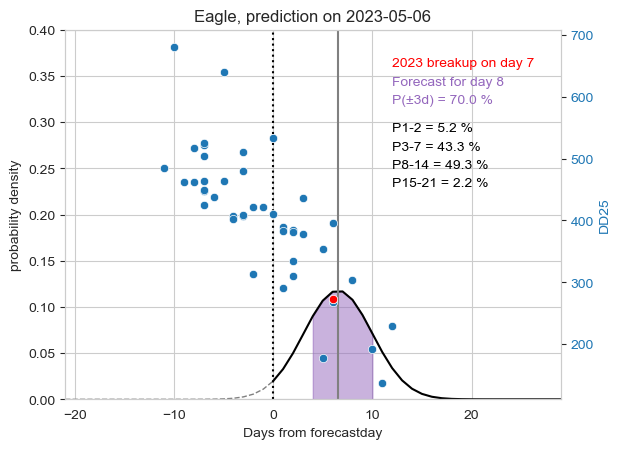

5.602823265443069 6.0 3.447864488799955 5 0.0814457623706879 0.5059434593783837 0.4014209678976435 0.011182261566157448


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


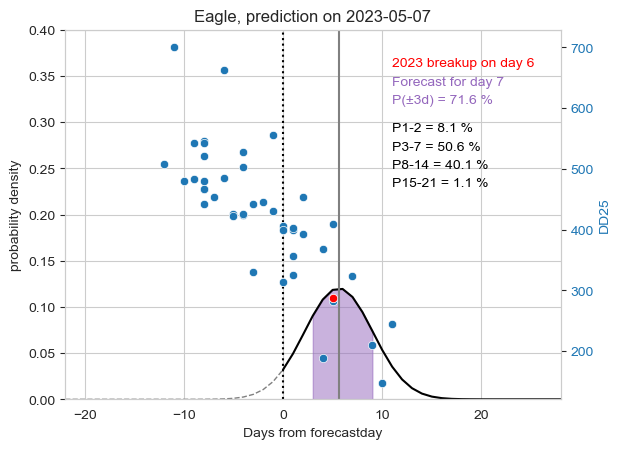

4.606144326975242 5.0 3.462739479625729 4 0.12310003007368617 0.5635750938225991 0.30797585854352827 0.0053468097445662525


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


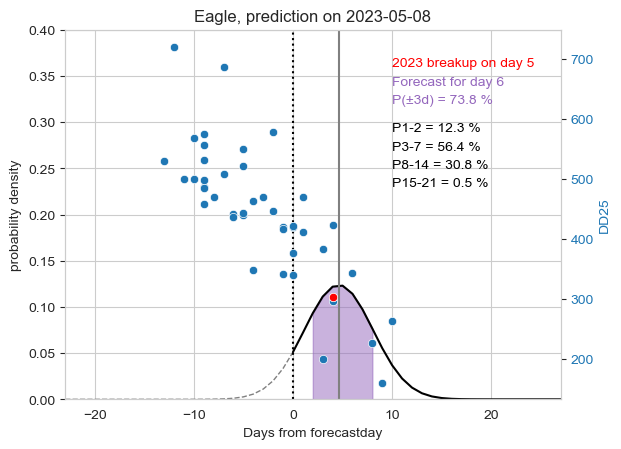

3.6239632325558677 4.0 3.4502797581198097 3 0.1731329890139156 0.5992113894711402 0.22535381690497483 0.0023012851204249


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


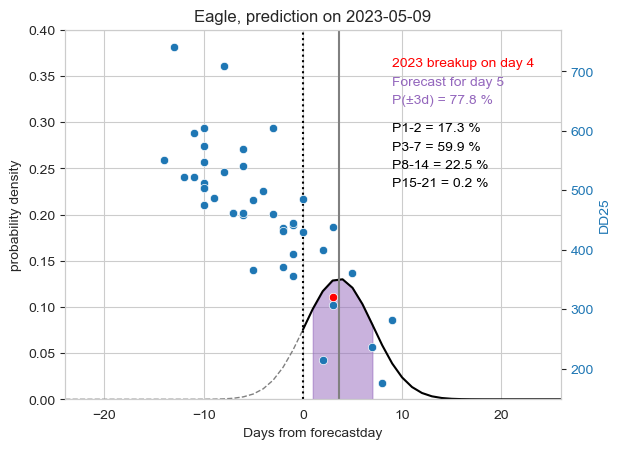

2.575151578402446 3.0 3.432931770087366 2 0.2357717126895434 0.6102239684736213 0.1531430539234089 0.0008611663115250258


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


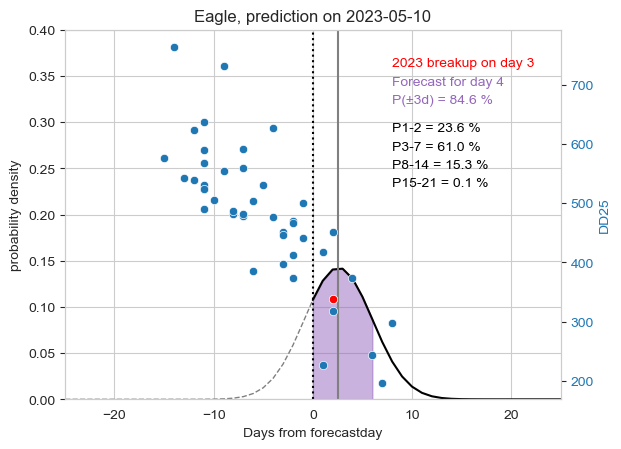

1.436395947038804 1.0 3.4332390765885794 1 0.3104075532739906 0.5924071933119688 0.09689013346265384 0.0002951023245950942


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


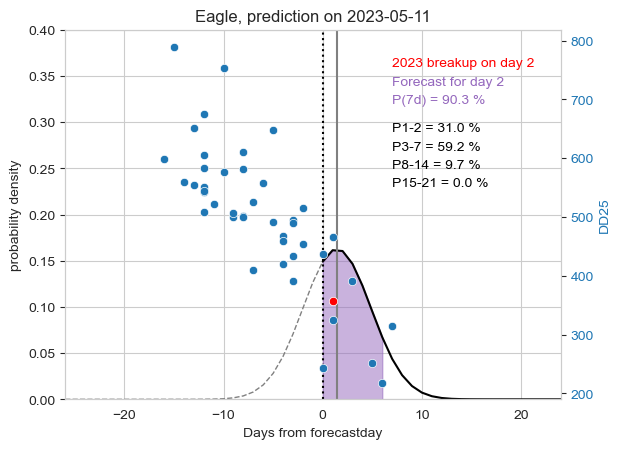

0.23239464334972304 0.0 3.4471493325888902 0 0.39075557149334356 0.551015487105418 0.0581328488141703 9.608947337435995e-05


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


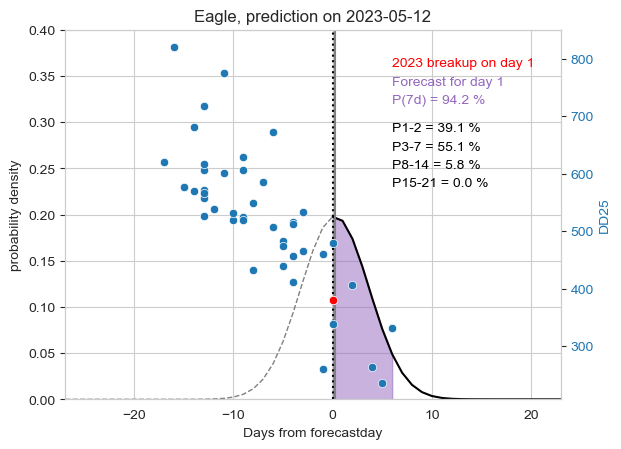

In [ ]:
# fudged version

xs = np.arange(-101, 101)
year = 2023
for_ffmpeg = True

icount = 1
for ii in range (40, 90, 1):
    breakup_avg_model = linear_model.LinearRegression() 
    DF = likelihoodDF[likelihoodDF.forecast_day_past_march1==ii].copy()
    DDval = DF[DF['year']==str(year)]['mean_DD'].squeeze()
    breakup_avg_model.fit(DF[['mean_DD']].values, DF[['days_from_then']].values)
    mu_0 = breakup_avg_model.predict([[DDval]]).item() + 2
    sigma_0 = mean_squared_error([breakup_avg_model.predict([[dd]]).item() for dd in DF['mean_DD'].tolist()],
                   DF['days_from_then'].tolist(), squared=False)

    # normalize on > 0 values
    pdf = stats.norm.pdf(xs, mu_0, sigma_0)/stats.norm.pdf(xs[101:], mu_0, sigma_0).sum()
    prob_12 = pdf[101:103].sum()
    prob_37 = pdf[103:108].sum()
    prob_wk2 = pdf[108:115].sum()
    prob_wk3 = pdf[115:122].sum()
    breakup_2022 = DF[DF.year==str(year)]['days_from_then'].squeeze()
    forecastdate = ru.dayssince2date(ii, year)
    print(mu_0, np.round(mu_0), sigma_0, breakup_2022, prob_12, prob_37, prob_wk2, prob_wk3)
    fig, ax1 = plt.subplots()
    ax1.plot(xs[:102], pdf[:102], linestyle='dashed', color='grey', linewidth=1)
    ax1.plot(xs[101:], pdf[101:], color='black')
    ax1.vlines(0, 0, 0.4, colors='black', linestyles='dotted')
    # Add most likely +/- 3 days
    mostlikely = int(np.round(mu_0) + 1)
    ax1.vlines(mu_0, 0, 0.4, colors='grey')
    startidx = max(101, 100 + mostlikely-3)
    endidx = startidx + 6
    shiftflag = False   # do we have to shift the +/- 3 day window?
    if  100 + mostlikely-3 < 101:
        shiftflag = True
    plusminus3daysprob = pdf[startidx:endidx+1].sum()
    ax1.fill_between(xs[startidx:endidx+1], pdf[startidx:endidx+1], color='tab:purple', alpha=0.5)
    ax1.text(78-ii, .36, f"{year} breakup on day {breakup_2022+1}", color='red')
    ax1.text(78-ii, .34, f"Forecast for day {mostlikely}", color='tab:purple')
    if shiftflag: 
        textsnippet = "7d"
    else:
        textsnippet = "±3d"
    ax1.text(78-ii, .32, f"P({textsnippet}) = {plusminus3daysprob*100:.1f} %", color='tab:purple')
    ax1.text(78-ii, .29, f"P1-2 = {prob_12*100:.1f} %", color='black')
    ax1.text(78-ii, .27, f"P3-7 = {prob_37*100:.1f} %", color='black')
    ax1.text(78-ii, .25, f"P8-14 = {prob_wk2*100:.1f} %", color='black')
    ax1.text(78-ii, .23, f"P15-21 = {prob_wk3*100:.1f} %", color='black')
    ax1.set_ylim((0, 0.40))
    ax1.set_ylabel('probability density')
    ax1.set_xlabel("Days from forecastday")
    ax2 = ax1.twinx()
    color = 'tab:blue'
    sns.scatterplot(data=DF, x='days_from_then', y='mean_DD', ax=ax2)
    sns.scatterplot(data=DF[DF.year==str(year)], x='days_from_then', y='mean_DD', ax=ax2, color='red')
    ax2.set_ylabel('DD25', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid(b=None)
    plt.title(f"{location_short}, prediction on {forecastdate}")
    plt.xlim((45-ii, 95-ii))

    plt.show()
    loc = location_short.upper().replace(' ', '_')
    if not for_ffmpeg:
        fig.savefig(outfolder / f"{loc}_DD25_{year}_{forecastdate}_withprior.png", bbox_inches='tight')
    else:
        fig.savefig(outfolder / f"{loc}_DD25_{year}_{icount:02d}_withprior.png", bbox_inches='tight')
        icount += 1 
    if breakup_2022 == 0: break

In [ ]:
outfolder.exists()

False

In [ ]:
stats.norm.pdf(xs, mu_0, sigma_0).sum()

0.41550719987373425

5.78129607869729


/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

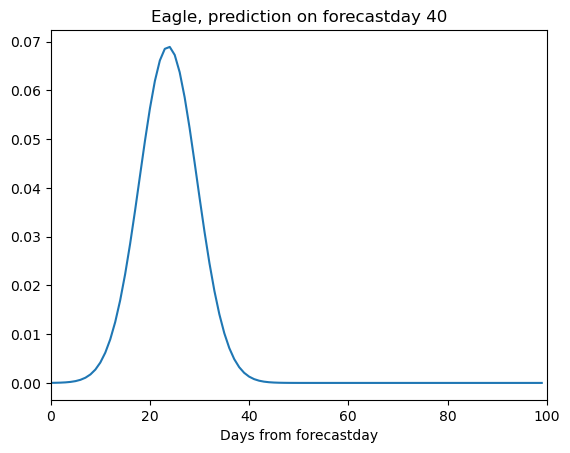

5.78129607869729


/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

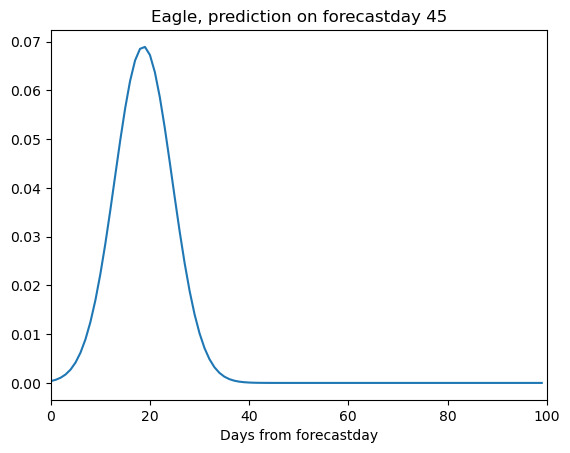

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

5.78129607869729


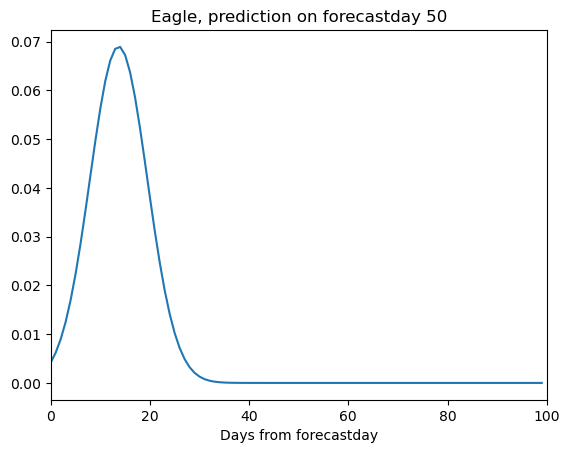

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

5.78129607869729


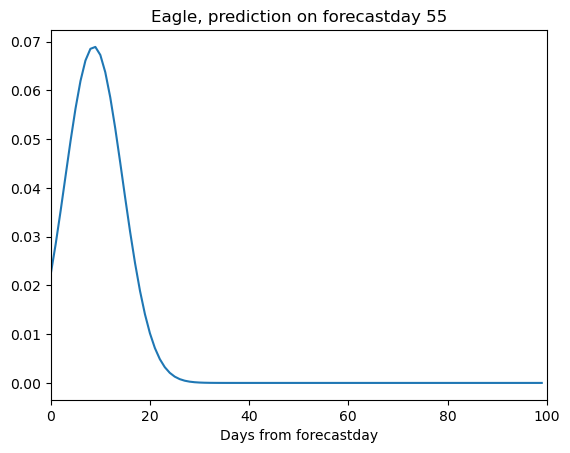

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

5.78129607869729


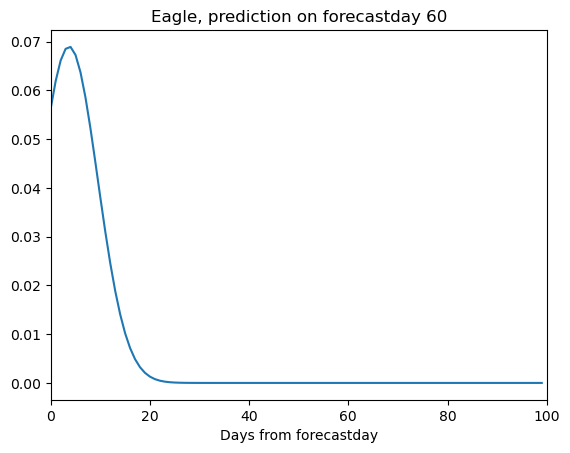

In [ ]:
for ii in range (40, 65, 5):
    breakup_avg_model = linear_model.LinearRegression() 
    DF = likelihoodDF[likelihoodDF.forecast_day_past_march1==ii].copy()
    breakup_avg_model.fit(DF[['year']], DF[['days_from_then']])
    mu_0 = breakup_avg_model.predict([[2023]]).item()
    sigma_0 = mean_squared_error([breakup_avg_model.predict([[yr]]).item() for yr in DF['year'].astype(int).tolist()],
                   DF['days_from_then'].tolist(), squared=False)
    print(sigma_0)
    plt.plot(xs, stats.norm.pdf(xs, mu_0, sigma_0))
    plt.title(f"Eagle, prediction on forecastday {ii}")
    plt.xlabel("Days from forecastday")
    plt.xlim((0, 100))
    plt.show()

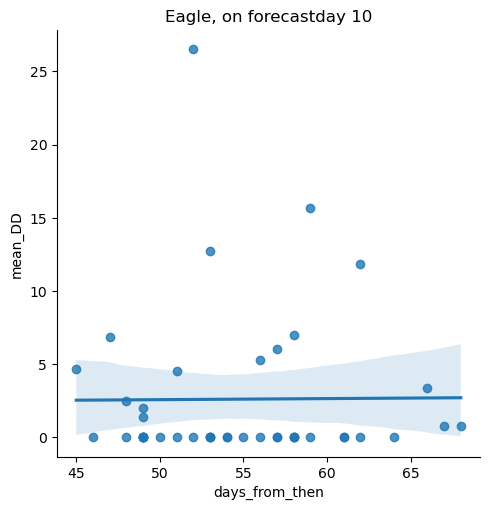

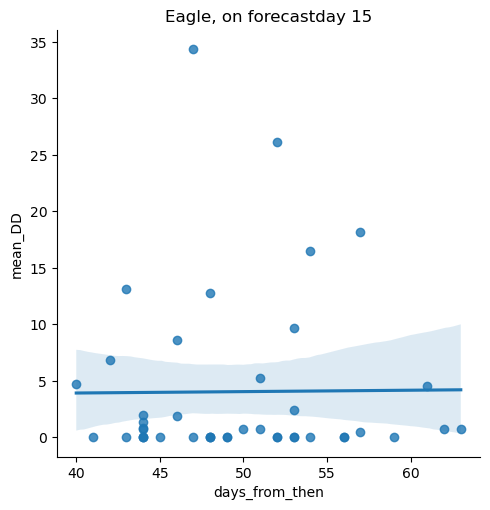

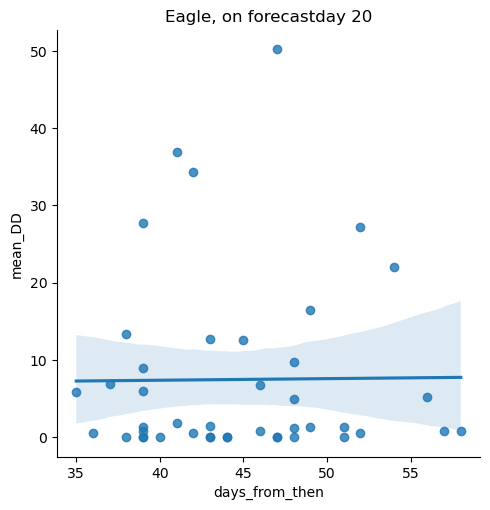

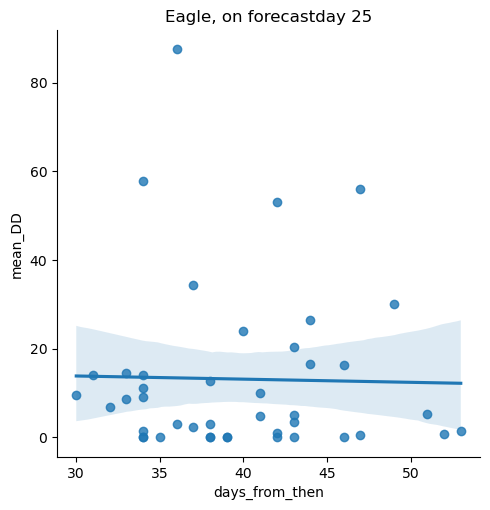

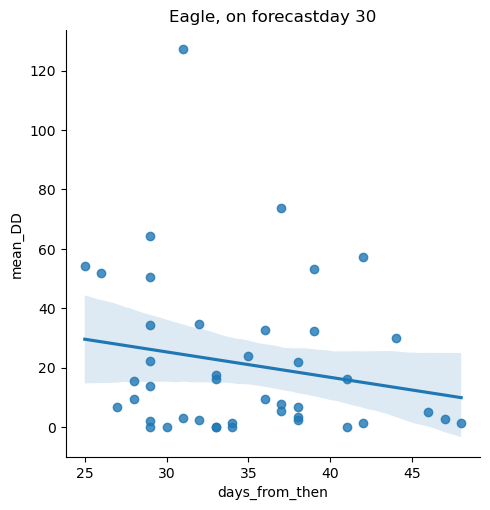

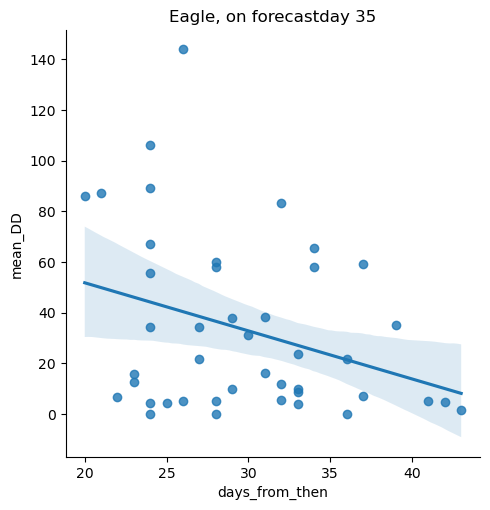

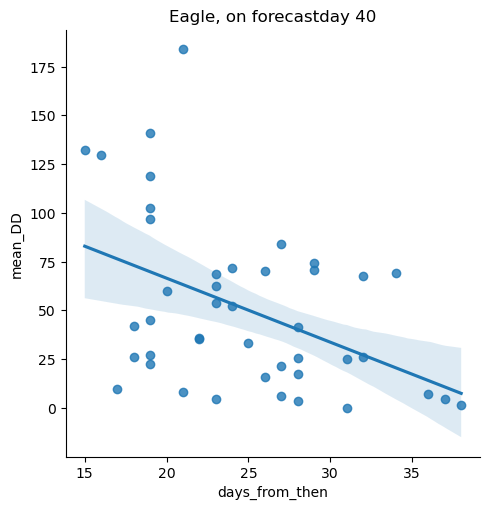

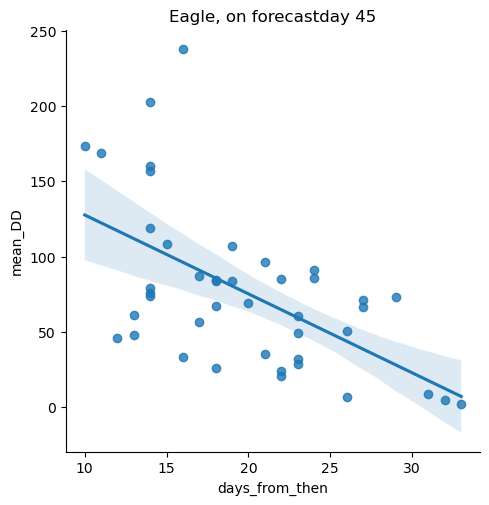

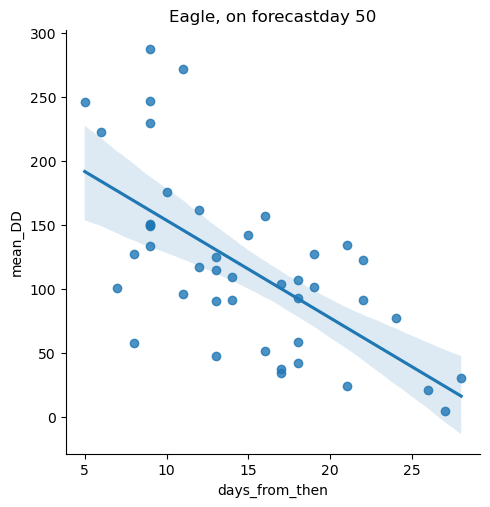

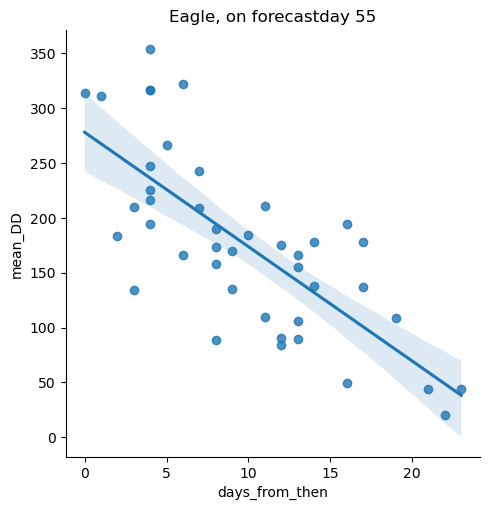

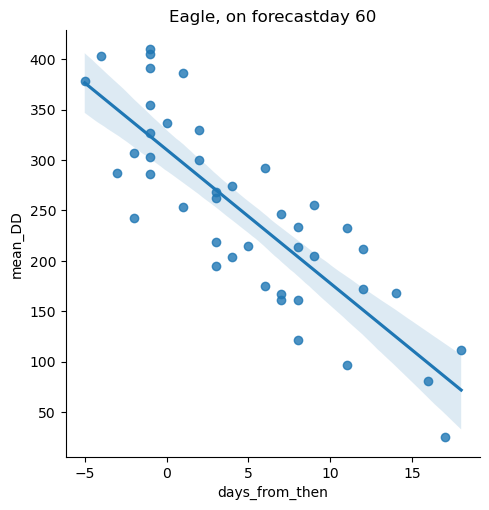

In [ ]:
# pivoted = likelihoodDF.pivot(index='forecast_day_past_march1', columns='days_from_then', values='mean_DD')
for ii in range (10, 65, 5):
    sns.lmplot(data=likelihoodDF[likelihoodDF.forecast_day_past_march1==ii], x='days_from_then', y='mean_DD')
    plt.title(f"Eagle, on forecastday {ii}")

Text(41.31482827771349, 0.5, 'Breakup in ... days')

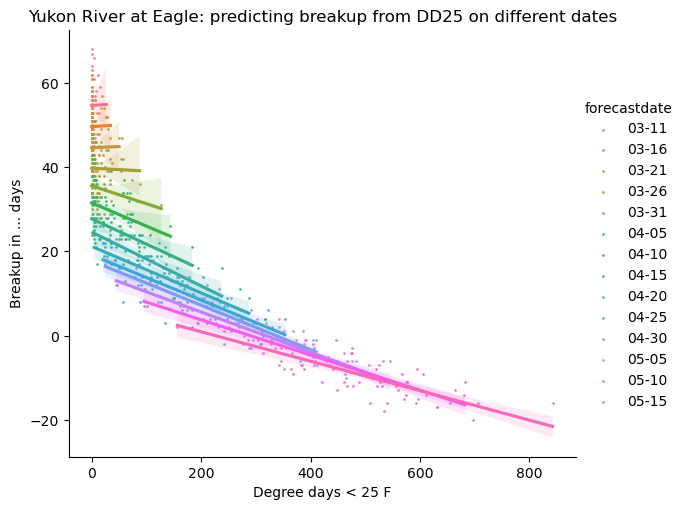

In [ ]:
sns.lmplot(data=likelihoodDF[likelihoodDF.forecast_day_past_march1 % 5 == 0], 
           hue='forecastdate', y='days_from_then', x='mean_DD', 
           scatter=True, scatter_kws={"s": 1},
           aspect=1.2,
           )
plt.title(f"Yukon River at Eagle: predicting breakup from {prefix} on different dates")
plt.xlabel('Degree days < 25 F')
plt.ylabel("Breakup in ... days")

In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days in possible_days:
    days_possible = days + days_after_march_1
    years = breakup[breakup['days_since_march1']==days].year.astype(str).to_list()
    if years != []:
        records.append(
            {'days_after_march_1': days_after_march_1,
                'days_from_then': days,
                'mean_DD': mean_eagle[years].mean(axis=1)[days_after_march_1]}
        )

In [ ]:
mean_eagle[['2014', '2019']].mean(axis=1)[0]

0.0

<AxesSubplot: xlabel='d_since_march1'>

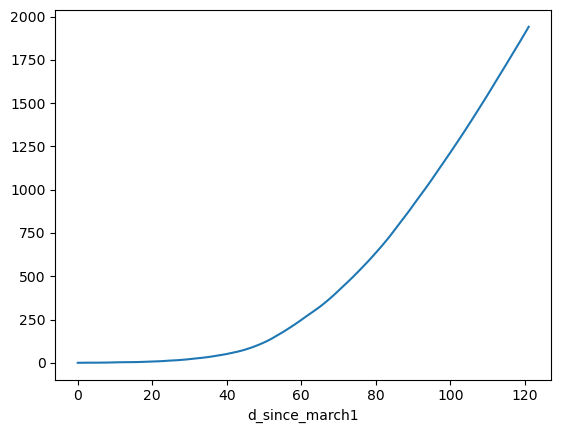

In [ ]:
mean_eagle.mean(axis=1).plot()

<AxesSubplot: xlabel='d_since_march1'>

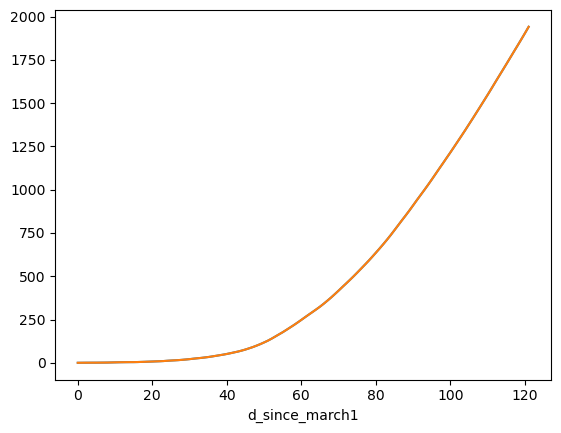

In [ ]:
mean_eagle1 = pd.concat(stationsdfs.values())
mean_eagle1 = mean_eagle1.groupby(mean_eagle1.index).mean()
ax = mean_eagle1.mean(axis=1).plot()
mean_eagle.mean(axis=1).plot(ax=ax)

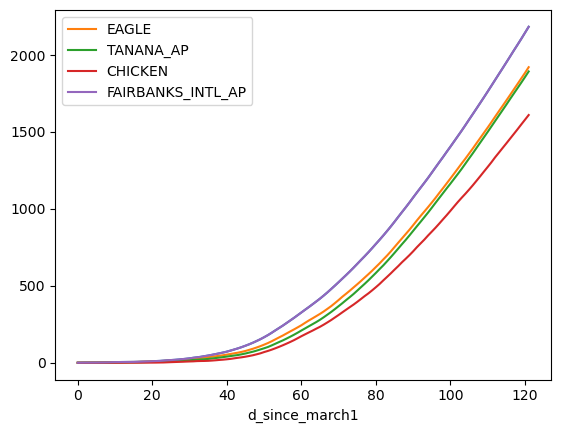

In [ ]:
ax = stationsdfs['FAIRBANKS_INTL_AP'].mean(axis=1).plot()
for key in stationsdfs.keys():
    stationsdfs[key].mean(axis=1).plot(ax=ax, label=key)
plt.legend()

## Make a combined dataset for stationdata

In [ ]:
sites = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AIRPORT', 'NENANA_MUN_AP']

In [ ]:
stationsdfs = {}
stationfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation")
for station in sites2:
    stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_TDD_cumul.csv", skiprows=4, index_col=0)